### <span style="color:black;font-weight:bold">Avaliação Final da matéria Introdução a Ciências de Dados</span>
#### <span style="color:black;font-weight:bold">Avaliação de conhecimento adquirido na disciplina</span>
#### <span style="color:green;font-weight:bold">Código feito por Arion Melkan de Freitas</span>

<span style="color:black">Primeiro passo que eu farei no notebook é fazer a importação de todas as possíveis bibliotecas que eu utilizarei ao longo
dessa avaliação </span>

In [1]:
# Importando as possíveis bibliotecas
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, 
                             classification_report, f1_score, make_scorer, mean_squared_error, r2_score)
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, KFold, GridSearchCV
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from statistics import variance 
import math 

# Ussando o comando set para plotar os gráficos de forma mais bonita mesmo que eu utilize o matplotlib
sns.set()

In [2]:
# Carregando a planilha de vinhos em um dataframe
wine = pd.read_csv('winequality-red.csv')

In [3]:
# Fazendo a primeira visualização do dataframe
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [4]:
# Visualizando o tamanho das dimensões (quantidade de linhas e colunas)
print(wine.shape)

(1599, 12)


In [5]:
# Visualizar a média e o desvio padrão de cada atributo (coluna), assim como visualizar os valores máximos e mínimos.
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### <span style="color:black;">1 - Etapa: Pré-Processamento</span>

##### <span style="color:black;"><ul><li>Verificação de Dados Faltantes</li><li>Verificação de Dados Duplicados</li><li>Tratamento dos Dados</li></ul></span>

In [6]:
# Validação se existe algum valor nulo em um dos meus atributos do dataframe
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Uma outra solução que poderia adotar para avaliar se existe algum valor NaN (Not a Number)
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Nesta célula validarei se ocorre algum dado duplicado e armazenar o resultado, fazendo com que se torne uma máscara booleana
serie_duplicado = wine.duplicated()

print(f'Existem a quantidade de {serie_duplicado.sum(axis=0)} registros duplicados.')

# Neste momento recupero os valores identificados como duplicados para avaliá-los e tomar uma decisão se eu deleto-os ou não
wine[serie_duplicado]

Existem a quantidade de 240 registros duplicados.


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [9]:
# Eu vou deletá-los, embora não tenha um identificador, por exemolo: 
# o registro de índice 4 é o mesmo registro do índice inicial [0]

# Removendo os valores duplicados
#wine.drop_duplicates(inplace=True)

wines = wine.drop_duplicates()

# Validar se foi retirado os 240 registros duplicados. No data set original, temos 1.599 registros.
#wine.shape
wines.shape

(1359, 12)

In [10]:
# Antes de começar o processo de normalização ou padronização. 
# Verificarei os tipos de dados de cada atributo do dataframe

#wine.dtypes
wines.dtypes
# Percebo que o meu target é o único atributo diferente dos demais em relação ao tipo de dado.

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

##### <span style="color:black;">Análise de Dados Balanceados e Análise de Outliers</span>

In [11]:
# Este método serve para separação da classe
def SeparacaoClasse(data = wine, target = 'quality'):
    # Separando meu atributo target dos demais atributos
    features = list(data.columns)
    features.remove(target)

    # Separando os conjuntos
    X = data[features]
    y = data[target]

    # Conferindo se os formatos estão corretos
    print(X.shape)
    print(y.shape)
    
    return X, y

In [12]:
# Usando meu dataframe wines com o padrão do target para quality
X, y = SeparacaoClasse(wines)

(1359, 11)
(1359,)


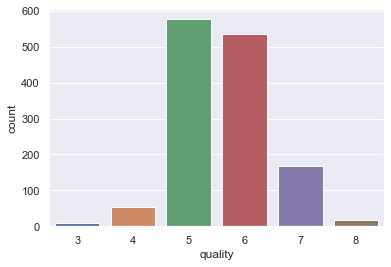

In [13]:
sns.countplot(y)

<span style='color:black'> Os dados não estão balanceados, a informação é de suma importância, pois precisarei
utilizar algum outro score levando em consideração os dados não balanceados. Além de descobrir a acurácia dos classificadores.</span>

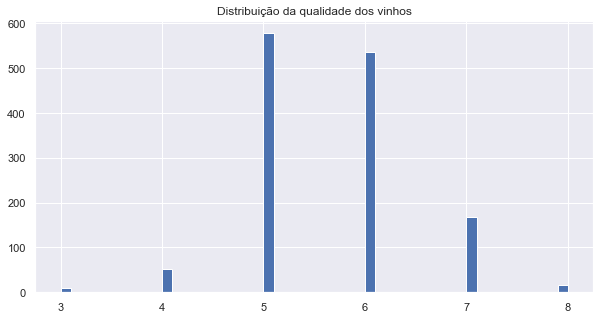

In [14]:
# Criando um gráfico de barras para perceber onde ocorre maiores concentrações de dados
target = 'quality'

plt.figure(figsize=(10, 5))
plt.hist(wines[target], bins=50)
plt.title('Distribuição da qualidade dos vinhos');

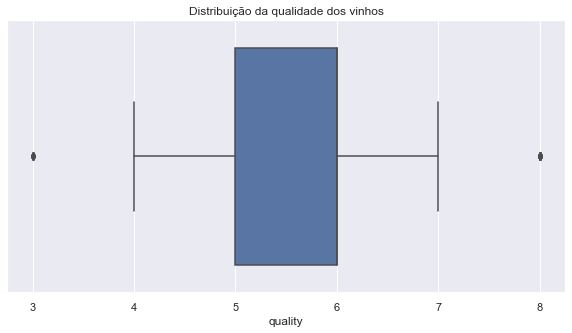

In [15]:
# Criando um boxplot para identificar se existe algum outliers nas 6 classe que possuo 
plt.figure(figsize=(10, 5))
sns.boxplot(x=y, data=wines)
plt.title('Distribuição da qualidade dos vinhos');

In [16]:
wines[wines[target] > 7]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
267             7.9              0.35         0.46             3.6      0.078   
278            10.3              0.32         0.45             6.4      0.073   
390             5.6              0.85         0.05             1.4      0.045   
440            12.6              0.31         0.72             2.2      0.072   
455            11.3              0.62         0.67             5.2      0.086   
481             9.4              0.30         0.56             2.8      0.080   
495            10.7              0.35         0.53             2.6      0.070   
588             5.0              0.42         0.24             2.0      0.060   
828             7.8              0.57         0.09             2.3      0.065   
1061            9.1              0.40         0.50             1.8      0.071   
1090           10.0              0.26         0.54             1.9      0.083   
1120            7.9              0.54         0.34             2.5      0.076   
1202            8.6              0.42         0.39             1.8      0.068   
1269            5.5              0.49         0.03             1.8      0.044   
1403            7.2              0.33         0.33             1.7      0.061   
1449            7.2              0.38         0.31             2.0      0.056   
1549            7.4              0.36         0.30             1.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
267                  15.0                  37.0  0.99730  3.35       0.86   
278                   5.0                  13.0  0.99760  3.23       0.82   
390                  12.0                  88.0  0.99240  3.56       0.82   
440                   6.0                  29.0  0.99870  2.88       0.82   
455                   6.0                  19.0  0.99880  3.22       0.69   
481                   6.0                  17.0  0.99640  3.15       0.92   
495                   5.0                  16.0  0.99720  3.15       0.65   
588                  19.0                  50.0  0.99170  3.72       0.74   
828                  34.0                  45.0  0.99417  3.46       0.74   
1061                  7.0                  16.0  0.99462  3.21       0.69   
1090                 42.0                  74.0  0.99451  2.98       0.63   
1120                  8.0                  17.0  0.99235  3.20       0.72   
1202                  6.0                  12.0  0.99516  3.35       0.69   
1269                 28.0                  87.0  0.99080  3.50       0.82   
1403                  3.0                  13.0  0.99600  3.23       1.10   
1449                 15.0                  29.0  0.99472  3.23       0.76   
1549                 17.0                  24.0  0.99419  3.24       0.70   

      alcohol  quality  
267      12.8        8  
278      12.6        8  
390      12.9        8  
440       9.8        8  
455      13.4        8  
481      11.7        8  
495      11.0        8  
588      14.0        8  
828      12.7        8  
1061     12.5        8  
1090     11.8        8  
1120     13.1        8  
1202     11.7        8  
1269     14.0        8  
1403     10.0        8  
1449     11.3        8  
1549     11.4        8

In [17]:
wines[wines[target] < 4]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459            11.6             0.580         0.66            2.20      0.074   
517            10.4             0.610         0.49            2.10      0.200   
690             7.4             1.185         0.00            4.25      0.097   
832            10.4             0.440         0.42            1.50      0.145   
899             8.3             1.020         0.02            3.40      0.084   
1299            7.6             1.580         0.00            2.10      0.137   
1374            6.8             0.815         0.00            1.20      0.267   
1469            7.3             0.980         0.05            2.10      0.061   
1478            7.1             0.875         0.05            5.70      0.082   
1505            6.7             0.760         0.02            1.80      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                  10.0                  47.0  1.00080  3.25       0.57   
517                   5.0                  16.0  0.99940  3.16       0.63   
690                   5.0                  14.0  0.99660  3.63       0.54   
832                  34.0                  48.0  0.99832  3.38       0.86   
899                   6.0                  11.0  0.99892  3.48       0.49   
1299                  5.0                   9.0  0.99476  3.50       0.40   
1374                 16.0                  29.0  0.99471  3.32       0.51   
1469                 20.0                  49.0  0.99705  3.31       0.55   
1478                  3.0                  14.0  0.99808  3.40       0.52   
1505                  6.0                  12.0  0.99600  3.55       0.63   

      alcohol  quality  
459      9.00        3  
517      8.40        3  
690     10.70        3  
832      9.90        3  
899     11.00        3  
1299    10.90        3  
1374     9.80        3  
1469     9.70        3  
1478    10.20        3  
1505     9.95        3

<span style='color:black;'>Retirarei as duas classes, pois não tenho muitos dados para trabalhar em cima delas e de certa forma prejudicará a avaliação dos meus classificadores.</span>

In [18]:
# Método para evitar codigo duplicado
def HoldOut(X_hold_out = X, y_hold_out = y):
    # Separando o conjunto de treinamento e de testes - Utilizando a técnica Hold Out
    X_train, X_test, Y_train, Y_test = train_test_split(X_hold_out, y_hold_out, test_size=0.2, random_state=0)

    # Verificando se está tudo certo
    print(X_train.shape)
    print(X_test.shape)
    print(Y_train.shape)
    print(Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [19]:
X_train, X_test, Y_train, Y_test = HoldOut(X, y)

(1087, 11)
(272, 11)
(1087,)
(272,)


In [20]:
Y_test.sort_values()

1505    3
690     3
1374    3
899     3
1235    4
       ..
488     7
946     7
1133    7
495     8
1269    8
Name: quality, Length: 272, dtype: int64

In [21]:
X_test.loc[[1505, 690, 1374, 899, 495, 1269]]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1505            6.7             0.760         0.02            1.80      0.078   
690             7.4             1.185         0.00            4.25      0.097   
1374            6.8             0.815         0.00            1.20      0.267   
899             8.3             1.020         0.02            3.40      0.084   
495            10.7             0.350         0.53            2.60      0.070   
1269            5.5             0.490         0.03            1.80      0.044   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1505                  6.0                  12.0  0.99600  3.55       0.63   
690                   5.0                  14.0  0.99660  3.63       0.54   
1374                 16.0                  29.0  0.99471  3.32       0.51   
899                   6.0                  11.0  0.99892  3.48       0.49   
495                   5.0                  16.0  0.99720  3.15       0.65   
1269                 28.0                  87.0  0.99080  3.50       0.82   

      alcohol  
1505     9.95  
690     10.70  
1374     9.80  
899     11.00  
495     11.00  
1269    14.00

<span style='color:black;'>Avaliando a parte dos conjuntos de testes, tenho pouquíssima informação das classes 3 e 8. Além disso no stratifiedKfold, eu tenho receio que os dados apresentados dessas duas classes nas divisões do conjunto de treinamento que eu passar, seja ele padronizado ou normalizado, não seja suficiente prejudicando a avaliação dos classificadores.</span>

In [22]:
valor_minimo = 3
valor_maximo = 8
target = 'quality'

# Estou criando um dataframe novo para armazenar os atributos que possuem as classes 4,5,6 e 7
wines_n = wines[(wines[target] > valor_minimo) & (wines[target] < valor_maximo)]

In [23]:
# Fazendo uma validação
wines_n.query('quality == 3 | quality == 8')

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [24]:
X_novo, y_novo = SeparacaoClasse(wines_n)

(1332, 11)
(1332,)


In [25]:
# Sobrescrevendo os valores para o conjunto de treinamento e teste
X_train, X_test, Y_train, Y_test = HoldOut(X_novo, y_novo)

(1065, 11)
(267, 11)
(1065,)
(267,)


##### <span style="color:black;">Normalização / Padronização</span>

In [26]:
# Convertendo os dados de treino e teste para normalização
X_train_normalized = X_train.copy(deep=True)
X_test_normalized = X_test.copy(deep=True)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normalized.iloc[:, :] = scaler.transform(X_train)
X_test_normalized.iloc[:, :] = scaler.transform(X_test)

In [27]:
# Convertendo os dados de treino e teste para padronização
X_train_scaled = X_train.copy(deep=True)
X_test_scaled = X_test.copy(deep=True)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled.iloc[:, :] = scaler.transform(X_train)
X_test_scaled.iloc[:, :] = scaler.transform(X_test)

In [28]:
# Criando o método para se ocorrer a necessidade de obter a média e o desvio padrão - evitar redundância do código
def ObterMediaDesvioPadrao(X_train_scaled):
    print('Dados transformados:\nMedia:')
    print(np.mean(X_train_scaled, axis = 0))
    print('\nDesvioPadrao:')
    print(np.std(X_train_scaled, axis = 0))

In [29]:
# Normalização
ObterMediaDesvioPadrao(X_train_normalized)

Dados transformados:
Media:
fixed acidity           0.327309
volatile acidity        0.339638
citric acid             0.267981
residual sugar          0.111904
chlorides               0.126511
free sulfur dioxide     0.209760
total sulfur dioxide    0.144384
density                 0.485911
pH                      0.448471
sulphates               0.192483
alcohol                 0.310309
dtype: float64

DesvioPadrao:
fixed acidity           0.150262
volatile acidity        0.150778
citric acid             0.195128
residual sugar          0.094295
chlorides               0.080673
free sulfur dioxide     0.147001
total sulfur dioxide    0.120265
density                 0.132531
pH                      0.119957
sulphates               0.095373
alcohol                 0.162457
dtype: float64


In [30]:
# Padronização
ObterMediaDesvioPadrao(X_train_scaled)

Dados transformados:
Media:
fixed acidity          -2.701999e-16
volatile acidity       -3.441952e-16
citric acid             1.039857e-16
residual sugar          7.404093e-17
chlorides               2.245335e-16
free sulfur dioxide     8.235457e-17
total sulfur dioxide    6.838557e-17
density                 3.078832e-14
pH                      6.500799e-16
sulphates               1.347905e-16
alcohol                 6.053061e-16
dtype: float64

DesvioPadrao:
fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64


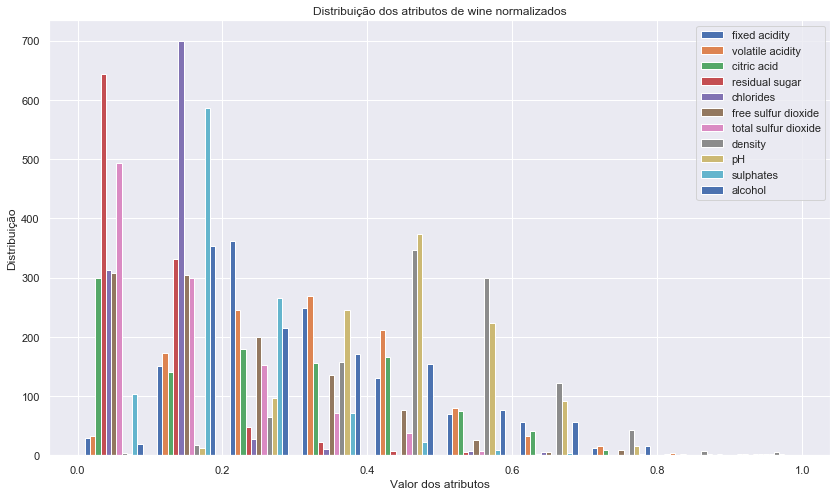

In [31]:
# Visualizar a distribuição em um histograma
fig = plt.figure(figsize=(14,8))

plt.hist(X_train_normalized.values, label=X_train.columns); 
plt.title('Distribuição dos atributos de wine normalizados') 
plt.xlabel('Valor dos atributos') 
plt.ylabel('Distribuição')
plt.legend();

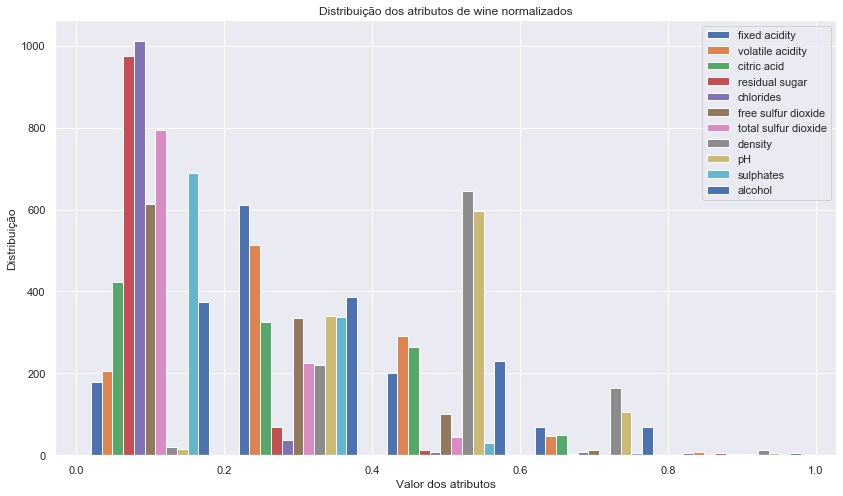

In [32]:
# Ajustando o gráfico para uma melhor visualização
bins_size = 0.2

bins = np.arange(0, 1 + bins_size, bins_size)

# Visualizar a distribuição em um histograma
fig = plt.figure(figsize=(14,8))

plt.hist(X_train_normalized.values, label=X_train.columns, bins=bins); 
plt.title('Distribuição dos atributos de wine normalizados') 
plt.xlabel('Valor dos atributos') 
plt.ylabel('Distribuição')
plt.legend();

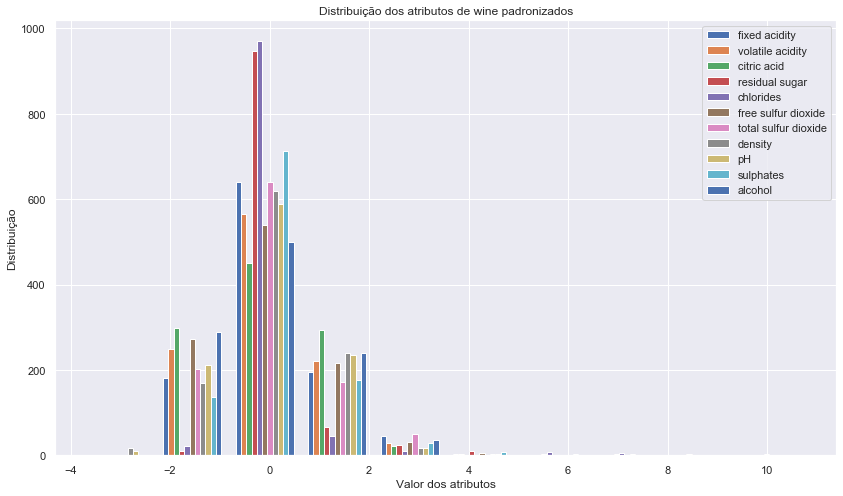

In [33]:
# Visualizar a distribuição em um histograma
fig = plt.figure(figsize=(14,8))

plt.hist(X_train_scaled.values, label=X_train.columns); 
plt.title('Distribuição dos atributos de wine padronizados') 
plt.xlabel('Valor dos atributos') 
plt.ylabel('Distribuição')
plt.legend();

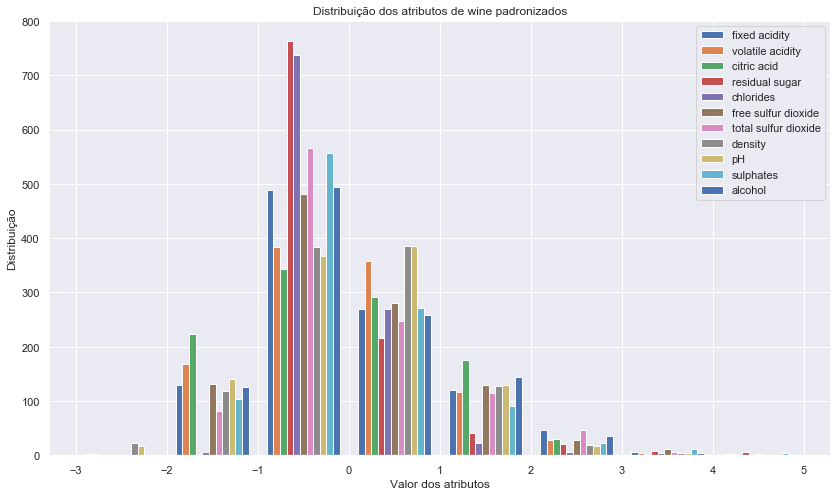

In [34]:
# Ajustando o gráfico para uma melhor visualização
bins_size = 1

bins = np.arange(-3, 5 + bins_size, bins_size)

# Visualizar a distribuição em um histograma
fig = plt.figure(figsize=(14,8))

plt.hist(X_train_scaled.values, label=X_train.columns, bins=bins); 
plt.title('Distribuição dos atributos de wine padronizados') 
plt.xlabel('Valor dos atributos') 
plt.ylabel('Distribuição')
plt.legend();

<span style='color:black'>Pelo o que eu pude perceber nos gráficos, a normalização trouxe os atributos com os valores
uns mais próximos aos outros e enquanto a padronizção, no meu entender, os atributos estão com os "pesos" mais semelhantes, mesmo que alguns atributos estejam com um número maior na distribuição. <br><br>
Explorarei mais a padronização e a normalização até eu decidir qual eu usarei.</span>

##### <span style="color:black;">Dados correlacionados</span>
<span style="color:black;">Nesta parte eu quero entender quais são as variáveis que possuem mais correlação e verificar se vale a pena retirá-las de acordo com a sua importância.</span>

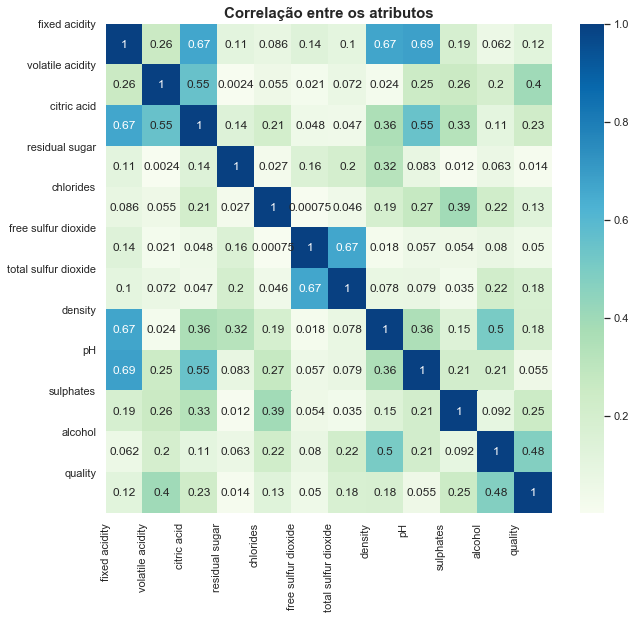

In [35]:
plt.figure(figsize=(10, 9))

corr = wines.corr()
my_cols = corr.columns.to_list()

sns.heatmap(np.abs(corr.values), annot=True, cmap='GnBu')

plt.title('Correlação entre os atributos', fontsize=15, fontweight='bold')
plt.yticks(np.arange(len(my_cols)), my_cols, rotation=0);
plt.xticks(np.arange(len(my_cols)), my_cols, rotation=90);

In [36]:
# correlação mínima
p = 0.65
# Utilizando o comprenhension para aproveitar conhecimento da outra matéria
var = [[i,j] for i in corr.columns for j in corr.columns if i != j if np.abs(corr[i][j]) > p]

print(f'Variáveis mais correlacionadas:\n{var}')

Variáveis mais correlacionadas:
[['fixed acidity', 'citric acid'], ['fixed acidity', 'density'], ['fixed acidity', 'pH'], ['citric acid', 'fixed acidity'], ['free sulfur dioxide', 'total sulfur dioxide'], ['total sulfur dioxide', 'free sulfur dioxide'], ['density', 'fixed acidity'], ['pH', 'fixed acidity']]


In [37]:
var_repete = [j for i in var for j in i]
moda = max(set(var_repete), key = var_repete.count)

print(f'A variável com mais correlações é a: {moda}')

A variável com mais correlações é a: fixed acidity


<span style='color:black'>Aqui eu percebo que a variável com mais correlações é a fixed acidity. Vou trabalhar mais um pouco
e identificar a sua importância no PCA para analisar se vale a pena ou não retirá-la</span>

##### <span style="color:black;">Análise Descritiva dos Dados</span>
<br>
<span style='color:black'>Nesta parte, utilizo o PCA para explorar mais a questão se eu utilizo a padronização ou a normalização, identificar com quanto número de componentes eu explico os meus dados e avaliar as variáveis mais importantes
    </span>

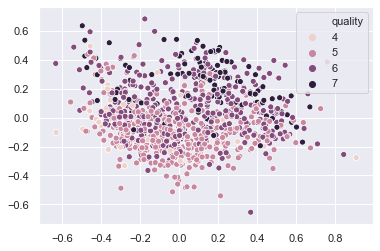

In [38]:
# Executando o PCA com os dados normalizados
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_normalized.values)

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=Y_train)

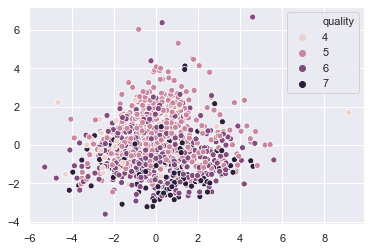

In [39]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_scaled.values)

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=Y_train)

<span style='color:black'>Retirando as classes 3 e 8, pude perceber que a geração do PCA com dois compenentes deixaram as classes mais espelhadas. Isso se torna mais visível na normalização onde acontece uma maior aproximação nos intervalos dos valores.</span>

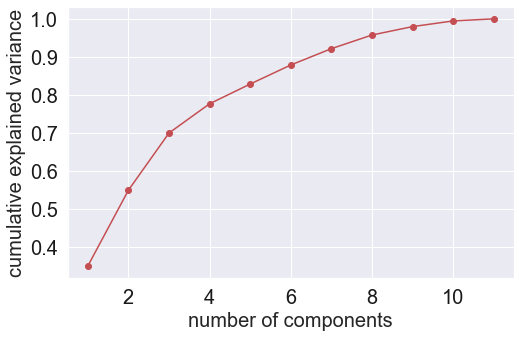

In [40]:
# Normalização - Variância acumulada com o número de componentes
pca = PCA().fit(X_train_normalized)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X_train_normalized)[1]+1)

# mostra a variância acumulada
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

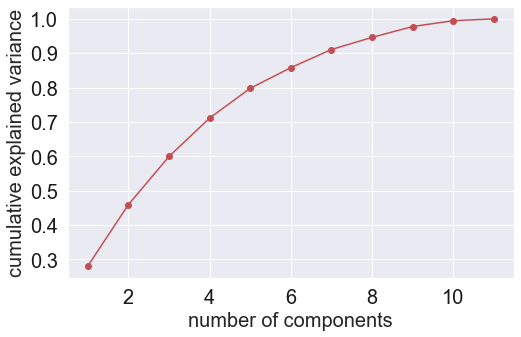

In [41]:
# Padronização - Variância acumulada com o número de componentes
pca = PCA().fit(X_train_scaled)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X_train_scaled)[1]+1)

# mostra a variância acumulada
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

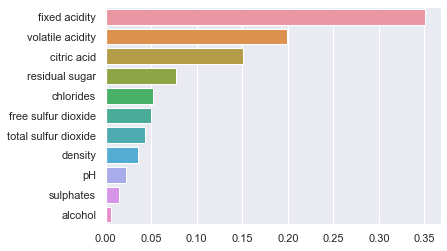

In [42]:
# Com seaborn - Normalização
pca = PCA()
pca_result = pca.fit_transform(X_train_normalized)
var_exp = pca.explained_variance_ratio_

sns.barplot(x=var_exp, y=X_train_normalized.columns)

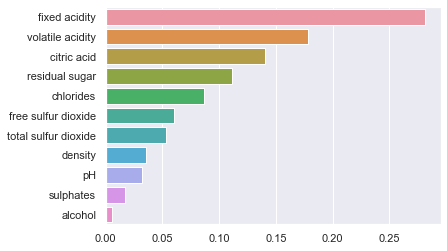

In [43]:
# Com seaborn - Padronização
pca = PCA()
pca_result = pca.fit_transform(X_train_scaled)
var_exp = pca.explained_variance_ratio_

sns.barplot(x=var_exp, y=X_train_normalized.columns)

<span style='color:black'>Aqui tem alguns pontos que quero destacar: <br> 
    <ol><li>A variância dos dados começou melhor na normalização, porém, no 8º componente, ocorre um mesmo resultado.</li>
        <li>A importância das variáveis na normalização, para as três primeiras variáveis foram mais equilibradas, enquanto na padronização, embora a primeira variável esteja com uma maior importância, as demais estão em maior equilíbrio</li>
    <li>A variável com mais correlação, a fixed acidity, é a mais importante em ambas análises. No entanto, por ela ter bastante correlação com as demais, eu a retirarei.</li></ol>
    <br>
    Não deu para perceber escolher no PCA a normalização ou a padronização. Ambos possuem pontos que, para mim, deixam suas vantagens em equilíbrio. Meu critério de desempate será na execução dos modelos de classificação.
</span>

In [44]:
my_column = 'fixed acidity'
X_train_normalized.drop(columns = my_column, inplace=True)
X_train_scaled.drop(columns = my_column, inplace=True)

X_test_normalized.drop(columns = my_column, inplace=True)
X_test_scaled.drop(columns = my_column, inplace=True)

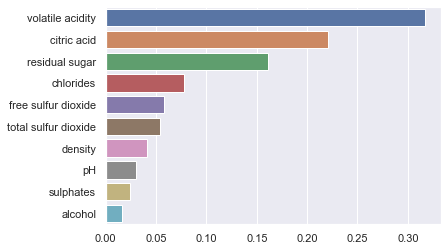

In [45]:
# Com seaborn - Normalização
pca = PCA()
pca_result = pca.fit_transform(X_train_normalized)
var_exp = pca.explained_variance_ratio_

sns.barplot(x=var_exp, y=X_train_normalized.columns)

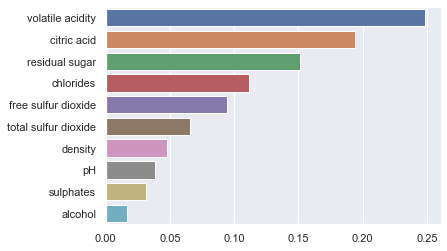

In [46]:
# Com seaborn - Padronização
pca = PCA()
pca_result = pca.fit_transform(X_train_scaled)
var_exp = pca.explained_variance_ratio_

sns.barplot(x=var_exp, y=X_train_normalized.columns)

<span style='color:black'>Uma vez retirada a variável fixed acidity, pude perceber que a importância dos demais atributos teve um maior equilíbrio, isto é, outras variáveis ganharam um pouco mais de importância. É o que eu quero seguir para os classificadores gerarem a acurácia, com os atributos tendo relevância.</span>

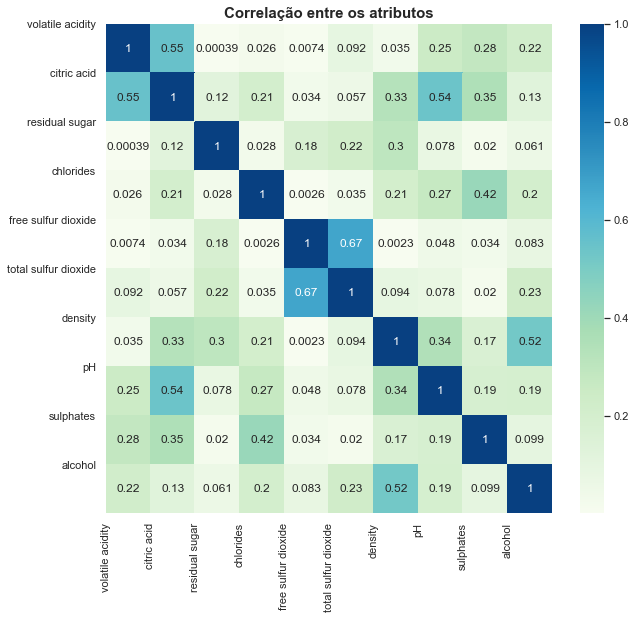

In [47]:
plt.figure(figsize=(10, 9))

corr = X_train_normalized.corr()
my_cols = corr.columns.to_list()

sns.heatmap(np.abs(corr.values), annot=True, cmap='GnBu')

plt.title('Correlação entre os atributos', fontsize=15, fontweight='bold')
plt.yticks(np.arange(len(my_cols)), my_cols, rotation=0);
plt.xticks(np.arange(len(my_cols)), my_cols, rotation=90);

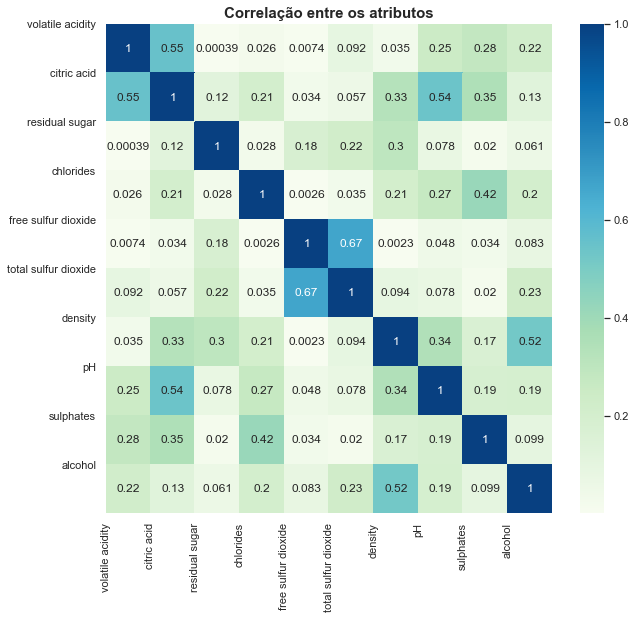

In [48]:
plt.figure(figsize=(10, 9))

corr = X_train_scaled.corr()
my_cols = corr.columns.to_list()

sns.heatmap(np.abs(corr.values), annot=True, cmap='GnBu')

plt.title('Correlação entre os atributos', fontsize=15, fontweight='bold')
plt.yticks(np.arange(len(my_cols)), my_cols, rotation=0);
plt.xticks(np.arange(len(my_cols)), my_cols, rotation=90);

<span style='color:black'>Rodei novamento o gráfico de correlação no cenário de dados normalizados e padronizados para identificar se alterou bruscamente a correlação dos dados com a retirada do fixed acidity</span>

### <span style="color:black;"> 2 - Classificação</span>
<span style="color:black;"><ul><li>Kvizinhos</li><li>Árvores de Decisão</li><li>Naive Bayes</li>
    <li>SVM</li><li>Random Forest</li></ul></span>

<span style='color:blue'> KNeighbors </span>

<span style='color:black'> Neste começo, aplicarei para as métricas [euclidean e minkowski] um cross validate, sem levar
em consideração que meus dados não estão balanceados</span>

In [49]:
def ExecutarModeloKNN(train = X_train_normalized.values, metric = 'minkowski'):
    # number of folds - escolhi a divisão por 3 porque tanto para o conjunto de treinamento quanto o de teste
    # a divisão não foi quebrada, impossibilitando algum split com mais dados.
    nkf = 3 
    vk = [] # armazena os valores de k
    vscore = []
    
    for k in range(1, 20):
        model = KNeighborsClassifier(n_neighbors=k, metric = metric)
        # realiza a validação cruzada
        cv = cross_validate(model, train, Y_train.values, cv=nkf)
        print('k:', k, 'accurace:', cv['test_score'].mean())
        vscore.append(cv['test_score'].mean()) 
        vk.append(k)

    plt.plot(vk, vscore, '-bo')
    plt.xlabel('k', fontsize = 15)
    plt.ylabel('Accuracy', fontsize = 15)
    plt.show(True)
    best_k = np.argmax(vscore)+1
    print('Melhor k:', best_k)
    
    return best_k

In [50]:
# Escolha aleatória do K - default
def AccuracyKNN(train = X_train_normalized, test = X_test_normalized, k = 5, metric = 'minkowski'):
    model = KNeighborsClassifier(n_neighbors=k, metric = metric)
    model.fit(train, Y_train)
    y_pred = model.predict(test)
    
    return accuracy_score(Y_test, y_pred)

k: 1 accurace: 0.5032863849765258
k: 2 accurace: 0.4751173708920187
k: 3 accurace: 0.4901408450704225
k: 4 accurace: 0.5211267605633804
k: 5 accurace: 0.5389671361502347
k: 6 accurace: 0.5399061032863849
k: 7 accurace: 0.5483568075117371
k: 8 accurace: 0.5568075117370892
k: 9 accurace: 0.5530516431924882
k: 10 accurace: 0.5755868544600938
k: 11 accurace: 0.5727699530516431
k: 12 accurace: 0.5699530516431924
k: 13 accurace: 0.5633802816901409
k: 14 accurace: 0.5727699530516431
k: 15 accurace: 0.5812206572769952
k: 16 accurace: 0.5793427230046948
k: 17 accurace: 0.5802816901408451
k: 18 accurace: 0.5784037558685445
k: 19 accurace: 0.5746478873239437


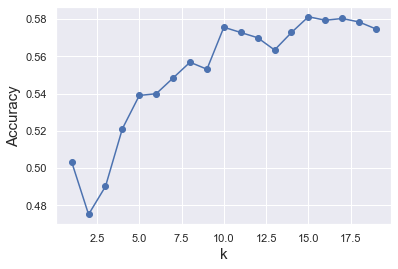

Melhor k: 15


In [51]:
# Com normalização
# Executando o modelo KNN com a métrica minkowski
best_k = ExecutarModeloKNN()

In [52]:
# Usando a normalização
train = X_train_normalized 
test = X_test_normalized

acc_m = AccuracyKNN(train, test, best_k)

print(f'Usando a métrica minkowski, cheguei a acurácia: {acc_m:.4f}')

Usando a métrica minkowski, cheguei a acurácia: 0.6105


k: 1 accurace: 0.5032863849765258
k: 2 accurace: 0.4751173708920187
k: 3 accurace: 0.4901408450704225
k: 4 accurace: 0.5211267605633804
k: 5 accurace: 0.5389671361502347
k: 6 accurace: 0.5399061032863849
k: 7 accurace: 0.5483568075117371
k: 8 accurace: 0.5568075117370892
k: 9 accurace: 0.5530516431924882
k: 10 accurace: 0.5755868544600938
k: 11 accurace: 0.5727699530516431
k: 12 accurace: 0.5699530516431924
k: 13 accurace: 0.5633802816901409
k: 14 accurace: 0.5727699530516431
k: 15 accurace: 0.5812206572769952
k: 16 accurace: 0.5793427230046948
k: 17 accurace: 0.5802816901408451
k: 18 accurace: 0.5784037558685445
k: 19 accurace: 0.5746478873239437


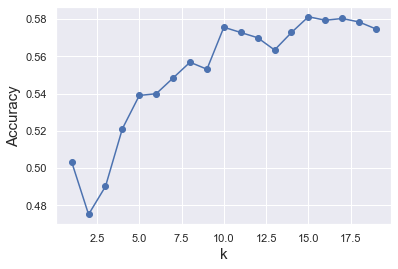

Melhor k: 15


In [53]:
# Com normalização e minkwoski
metric = 'euclidean'
train = X_train_normalized.values
best_k = ExecutarModeloKNN(train, metric)

In [54]:
# Usando a normalização e euclidean
metric = 'euclidean'
train = X_train_normalized 
test = X_test_normalized

acc_e = AccuracyKNN(train, test, best_k, metric)

print(f'Usando a métrica euclidiana, cheguei a acurácia: {acc_e:.4f}')

Usando a métrica euclidiana, cheguei a acurácia: 0.6105


k: 1 accurace: 0.515492957746479
k: 2 accurace: 0.49765258215962443
k: 3 accurace: 0.5192488262910798
k: 4 accurace: 0.5389671361502347
k: 5 accurace: 0.5483568075117371
k: 6 accurace: 0.5474178403755868
k: 7 accurace: 0.5624413145539906
k: 8 accurace: 0.5605633802816902
k: 9 accurace: 0.564319248826291
k: 10 accurace: 0.564319248826291
k: 11 accurace: 0.5446009389671361
k: 12 accurace: 0.5596244131455399
k: 13 accurace: 0.5549295774647888
k: 14 accurace: 0.5577464788732395
k: 15 accurace: 0.5690140845070423
k: 16 accurace: 0.5661971830985916
k: 17 accurace: 0.5755868544600938
k: 18 accurace: 0.5727699530516431
k: 19 accurace: 0.5690140845070423


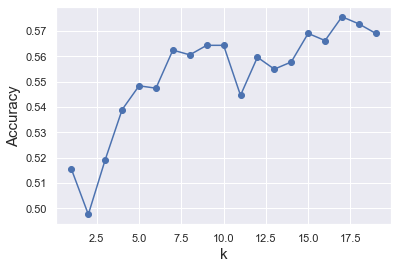

Melhor k: 17


In [55]:
# Com padronização
# Executando o modelo KNN com a métrica minkowski
best_k = ExecutarModeloKNN(X_train_scaled)

In [56]:
# Usando a padronização e minkwoski
train = X_train_scaled 
test = X_test_scaled

acc_m = AccuracyKNN(train, test, best_k)

print(f'Usando a métrica minkowski, cheguei a acurácia: {acc_m:.4f}')

Usando a métrica minkowski, cheguei a acurácia: 0.6067


k: 1 accurace: 0.515492957746479
k: 2 accurace: 0.49765258215962443
k: 3 accurace: 0.5192488262910798
k: 4 accurace: 0.5389671361502347
k: 5 accurace: 0.5483568075117371
k: 6 accurace: 0.5474178403755868
k: 7 accurace: 0.5624413145539906
k: 8 accurace: 0.5605633802816902
k: 9 accurace: 0.564319248826291
k: 10 accurace: 0.564319248826291
k: 11 accurace: 0.5446009389671361
k: 12 accurace: 0.5596244131455399
k: 13 accurace: 0.5549295774647888
k: 14 accurace: 0.5577464788732395
k: 15 accurace: 0.5690140845070423
k: 16 accurace: 0.5661971830985916
k: 17 accurace: 0.5755868544600938
k: 18 accurace: 0.5727699530516431
k: 19 accurace: 0.5690140845070423


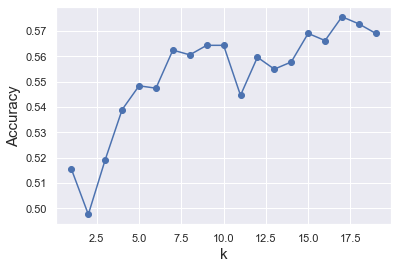

Melhor k: 17


In [57]:
# Com padronização
metric = 'euclidean'
best_k = ExecutarModeloKNN(X_train_scaled, metric)

In [58]:
# Usando a padronização e euclidean
metric = 'euclidean'
train = X_train_scaled 
test = X_test_scaled

acc_e = AccuracyKNN(train, test, best_k, metric)

print(f'Usando a métrica euclidiana, cheguei a acurácia: {acc_e:.4f}')

Usando a métrica euclidiana, cheguei a acurácia: 0.6067


<span style='color:black;font-weight:bold'> O melhor resultado foi com o cenário dos dados normalizados, embora estejam bastante próximos as acurácias dos dois cenários. A mudança de métrica não foi o fator principal para alterar a acurácia. <br>Na próxima célula, buscarei o melhor k a partir do StratifiedKfold para verificar se alterarei a avaliação do classificador KNN.</span>

In [59]:
# Nesta célula criei um método para não repetir código
def ExecutarModelo(train = X_train_normalized, metric = 'minkowski'):
    
    # Escolhi a divisão por 3 porque tanto para o conjunto de treinamento quanto o de teste a divisão não foi quebrada,
    # impossibilitando algum split com mais dados.
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

    mpre = []
    macc = []
    vk = []
    for k in range(1, 30):
        vpre = []
        vacc = []
        for train_index, test_index in cv.split(train, Y_train):
            # select rows
            x_train, x_test = train.iloc[train_index], train.iloc[test_index]
            y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
            
            model = KNeighborsClassifier(n_neighbors=k, metric = metric)
            model.fit(x_train,y_train)
            y_pred = model.predict(x_test)
            score = accuracy_score(y_test, y_pred)
            
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                vpre.append(precision_score(y_test, y_pred, average='weighted'))
                
            vacc.append(score)
            
        macc.append(np.mean(vacc))
        mpre.append(np.mean(vpre))
        vk.append(k)
        
    best_k = np.argmax(mpre)+1
    print('Melhor k:', best_k, ' Precision:',mpre[best_k-1])
    plt.figure(figsize=(10,5))
    plt.plot(vk, mpre, '-ro', label= 'Precision')
    plt.plot(vk, macc, '-bo', label = 'Accuracy')
    plt.xlabel('k', fontsize = 15)
    plt.ylabel('Score', fontsize = 15)
    plt.legend()
    plt.show()
    
    return best_k

Melhor k: 24  Precision: 0.5496269784557998


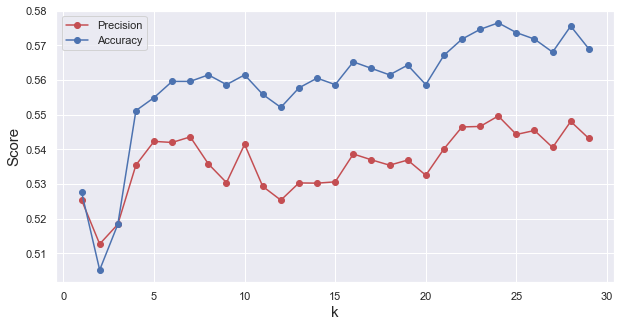

In [60]:
# Dados normalizados
# Minkwoski
best_k = ExecutarModelo()

In [61]:
# Com dados normalizados
train = X_train_normalized 
test = X_test_normalized

acc_m = AccuracyKNN(train, test, best_k)

print(f'Usando a métrica minkowski, cheguei a acurácia: {acc_m:.4f}')

Usando a métrica minkowski, cheguei a acurácia: 0.5880


Melhor k: 24  Precision: 0.5496269784557998


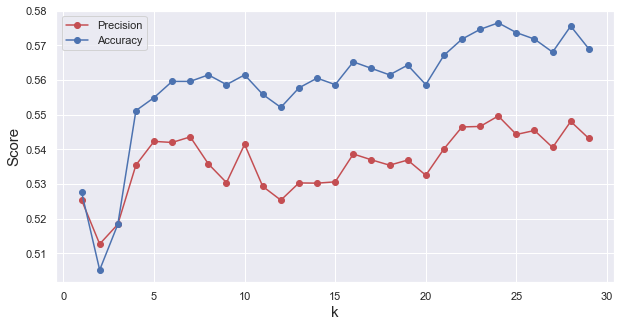

In [62]:
# Dados normalizados
train = X_train_normalized
# Euclideana
best_k = ExecutarModelo(train, 'euclidean')

In [63]:
# Com dados normalizados
metric = 'euclidean'
train = X_train_normalized 
test = X_test_normalized

acc_e = AccuracyKNN(train, test, best_k, metric)

print(f'Usando a métrica euclidiana, cheguei a acurácia: {acc_e:.4f}')

Usando a métrica euclidiana, cheguei a acurácia: 0.5880


Melhor k: 11  Precision: 0.5525633525084953


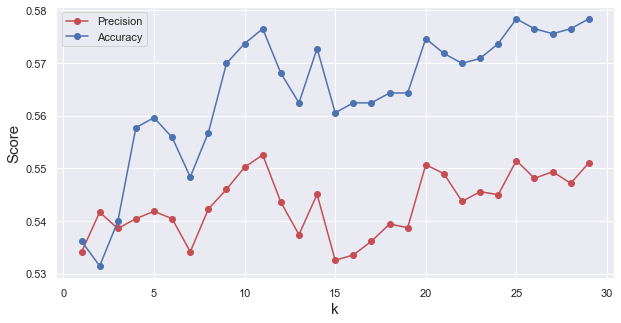

In [64]:
# Dados padronizados
train = X_train_scaled
# Minkwoski
best_k = ExecutarModelo(train)

In [65]:
# Com dados padronizados
metric = 'euclidean'
train = X_train_scaled 
test = X_test_scaled

acc_m = AccuracyKNN(train, test, best_k)

print(f'Usando a métrica minkowski, cheguei a acurácia: {acc_m:.4f}')

Usando a métrica minkowski, cheguei a acurácia: 0.6180


Melhor k: 11  Precision: 0.5525633525084953


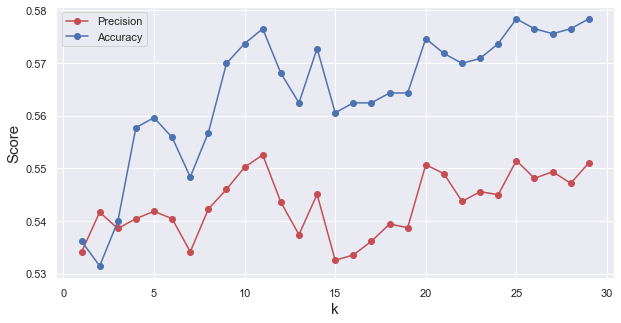

In [66]:
# Dados padronizados
train = X_train_scaled
# Euclidiana
best_k = ExecutarModelo(train, 'euclidean')

In [67]:
# Com dados padronizados
metric = 'euclidean'
train = X_train_scaled 
test = X_test_scaled

acc_e = AccuracyKNN(train, test, best_k, metric)

print(f'Usando a métrica euclidiana, cheguei a acurácia: {acc_e:.4f}')

Usando a métrica euclidiana, cheguei a acurácia: 0.6180


<span style='color:black;font-weight:bold'>Dessa vez usando o StratifiedKFold obtive um resultado melhor com os dados padronizados, inclusive, tanto na métrica euclideana quanto na minkwoski os valores foram um pouco melhores. <br>Reforço que a métrica para esses dados não influenciou a acurácia.<br>Para o KNN as classes estarem mais separadas é favorável a identificação de um novo objeto a sua respectiva classe e neste caso os dados para essas classes estão um em cima do outro, o que dificulta a avaliação desse classificador.</span>

<span style='color:blue'> Árvores de Decisão </span>

In [68]:
def ExecutarDecisionTree(train = X_train_normalized, test = X_test_normalized, criterion = 'gini'):
    model = DecisionTreeClassifier(criterion = criterion, random_state = 101)
    model.fit(train, Y_train)
    y_pred = model.predict(test) 
    
    return y_pred

In [69]:
# Com normalização e métrica gini
Y_pred = ExecutarDecisionTree()

score = accuracy_score(Y_test, Y_pred)
print(f'Minha acurácia com o critério gini: {score:.2f}')

Minha acurácia com o critério gini: 0.50


In [70]:
# Com normalização e métrica entropia
train = X_train_normalized
test  = X_test_normalized

Y_pred = ExecutarDecisionTree(train, test, 'entropy')

score = accuracy_score(Y_test, Y_pred)
print(f'Minha acurácia com o critério entropia: {score:.2f}')

Minha acurácia com o critério entropia: 0.55


In [71]:
# Com normalização e métrica gini
train = X_train_scaled
test  = X_test_scaled

Y_pred = ExecutarDecisionTree(train, test)

score = accuracy_score(Y_test, Y_pred)
print(f'Minha acurácia com o critério gini: {score:.2f}')

Minha acurácia com o critério gini: 0.50


In [72]:
# Com normalização e métrica entropia
train = X_train_scaled
test  = X_test_scaled

Y_pred = ExecutarDecisionTree(train, test, 'entropy')

score = accuracy_score(Y_test, Y_pred)
print(f'Minha acurácia com o critério entropia: {score:.2f}')

Minha acurácia com o critério entropia: 0.55


<span style='color:black;font-weight:bold'>Neste caso, a minha árvore de decisão foi melhor com o critério de entropia. As acurácias ficaram parecidas com os cenários de normalização e padronização. <br>Ou seja, diferentemente do KNN, a métrica foi o principal fator de melhora ou piora nos dados.</span>

<span style='color:blue'> Naives Bayes </span>

In [73]:
# Criei o método para avaliar o Gaussian e Bernoulli
def ExecutarNB(train = X_train_normalized, test = X_test_normalized, model = GaussianNB()):
    clf = model
    clf.fit(train, Y_train)
    y_pred = clf.predict(test)
    
    acc = accuracy_score(Y_test, y_pred)
    print(f'Naive Bayes - Acurácia: {acc:.4f}')

In [74]:
# Executando com Gaussian NB - Dados normalizados
ExecutarNB()

Naive Bayes - Acurácia: 0.5581


In [75]:
# Executando com Bernoulli NB - Dados normalizados
train = X_train_normalized
test  = X_test_normalized

ExecutarNB(train, test, BernoulliNB())

Naive Bayes - Acurácia: 0.4307


In [76]:
# Executando com Gaussian NB - Dados padronizados
train = X_train_scaled
test  = X_test_scaled

ExecutarNB(train, test)

Naive Bayes - Acurácia: 0.5581


In [77]:
# Executando com Bernoulli NB - Dados padronizados
train = X_train_scaled
test  = X_test_scaled

ExecutarNB(train, test, BernoulliNB())

Naive Bayes - Acurácia: 0.5506


<span style='color:black;font-weight:bold'>Meu melhor resultado foi utilizar o Naives Bayes - Bernoulli e com os dados padronizados. <br>Um fato curioso é que a métrica do GaussianNB classificou, independemente dos dados normalizados ou padronizados, da mesma maneira. O que não aconteceu com a métrica do BernoulliNB.</span>

<span style='color:blue'> Support Vector Machine </span>

In [78]:
def ExecutarSVM(train = X_train_normalized, kernel = 'rbf'):
    
    # Escolhi a divisão por 3 porque tanto para o conjunto de treinamento quanto o de teste a divisão não foi quebrada,
    # impossibilitando algum split com mais dados.
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    
    mpre = []
    macc = []
    vc = []
    
    for c in range(1, 30):
        vpre = []
        vacc = []
        
        for train_index, test_index in cv.split(train, Y_train):
            # select rows
            x_train, x_test = train.iloc[train_index], train.iloc[test_index]
            y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
            
            model = SVC(C = c, gamma = 'auto', kernel = kernel)
            model.fit(x_train,y_train)
            y_pred = model.predict(x_test) 
            score = accuracy_score(y_test, y_pred)
            
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                vpre.append(precision_score(y_test, y_pred, average='weighted'))
                
            vacc.append(score)
            
        macc.append(np.mean(vacc))
        mpre.append(np.mean(vpre))
        vc.append(c)
        
    best_c = np.argmax(mpre)+1
    print('Melhor c:', best_c, ' Precision:',mpre[best_c-1])
    plt.figure(figsize=(10,5))
    plt.plot(vc, mpre, '-ro', label= 'Precision')
    plt.plot(vc, macc, '-bo', label = 'Accuracy')
    plt.xlabel('c', fontsize = 15)
    plt.ylabel('Score', fontsize = 15)
    plt.legend()
    plt.show()
    
    return best_c

In [79]:
# Método para evitar código duplicado e será o que vai indentificar a minha acurácia para o SVM
# A escolha do C como default foi randômica
def AccSVM(train = X_train_normalized, test = X_test_normalized, best_c = 10, kernel = 'rbf'):
    
    model = SVC(C = best_c, gamma = 'auto', kernel = kernel)
    model.fit(train, Y_train)
    y_pred = model.predict(test) 
    
    score = accuracy_score(Y_test, y_pred)
    
    print(f"Minha acurácia: {score:.4f}")

Melhor c: 25  Precision: 0.5100113767052495


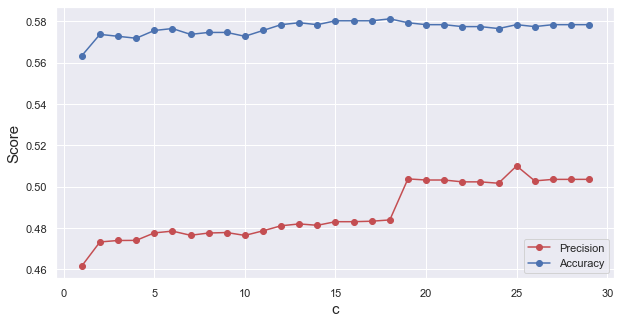

In [80]:
# Com normalização e o kernel rbf
train = X_train_normalized

best_c = ExecutarSVM(train)

In [81]:
# Dados normalizados e o kernel rbf
train = X_train_normalized
test  = X_test_normalized

AccSVM(train, test, best_c)

Minha acurácia: 0.6105


Melhor c: 13  Precision: 0.5126830433384455


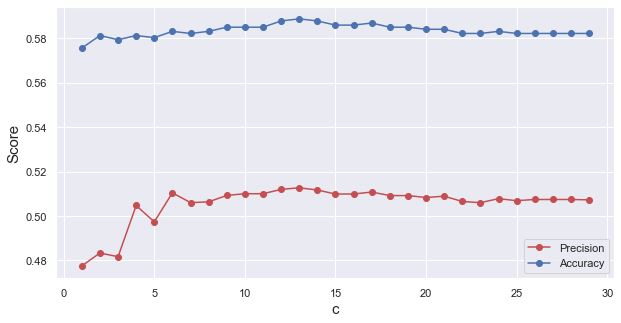

In [82]:
# Com normalização e o kernel linear
train = X_train_normalized
kernel = 'linear'

best_c = ExecutarSVM(train, kernel)

In [83]:
# Dados normalizados e o kernel linear
train = X_train_normalized
test  = X_test_normalized
kernel = 'linear'

AccSVM(train, test, best_c, kernel)

Minha acurácia: 0.6142


Melhor c: 2  Precision: 0.5747999053951005


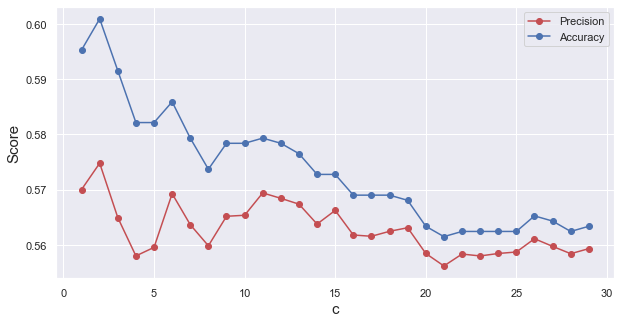

In [84]:
# Com padronização e o kernel rbf
train = X_train_scaled

best_c = ExecutarSVM(train)

In [85]:
# Dados padronizado e o kernel rbf
train = X_train_scaled
test  = X_test_scaled

AccSVM(train, test, best_c)

Minha acurácia: 0.6442


Melhor c: 2  Precision: 0.5082658295902044


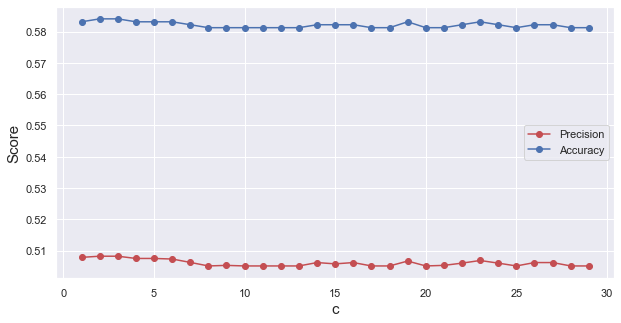

In [86]:
# Com padronização e o kernel linear
train = X_train_scaled
kernel = 'linear'

best_c = ExecutarSVM(train, kernel)

In [87]:
# Dados padronizados e o kernel linear
train = X_train_scaled
test  = X_test_scaled
kernel = 'linear'

AccSVM(train, test, best_c, kernel)

Minha acurácia: 0.6030


<span style='color:black;font-weight:bold'>Em comparação com todos os cenários, os dados padronizados com o kernel rbf foi o que obteve melhor acurácia.<br>Também obtive a pior a acurácia com os dados padronizados, mas utilizando o kernel linear.<br> O cenário com os dados normalizados, a acurácia não possuiu uma variação grande.</span>

<span style='color:blue'> Random Forest </span>

In [88]:
def ExecuteRandomForest(train = X_train_normalized, criterion = 'gini'):
    
    # Escolhi a divisão por 3 porque tanto para o conjunto de treinamento quanto o de teste a divisão não foi quebrada,
    # impossibilitando algum split com mais dados.
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    
    mpre = []
    macc = []
    vc = []
    
    for n in range(1, 30):
        vpre = []
        vacc = []
        
        for train_index, test_index in cv.split(train, Y_train):
            # select rows
            x_train, x_test = train.iloc[train_index], train.iloc[test_index]
            y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
            
            model = RandomForestClassifier(n_estimators=n, bootstrap=True, class_weight=None, criterion=criterion,
                                                max_depth=None, max_features='auto', max_leaf_nodes=None,
                                                min_impurity_decrease=0.0, min_impurity_split=None,
                                                min_samples_leaf=1, min_samples_split=2,
                                                min_weight_fraction_leaf=0.0, n_jobs=1,
                                                oob_score=False, random_state=None, verbose=0,
                                                warm_start=False)
            
            model.fit(x_train,y_train)
            y_pred = model.predict(x_test) 
            score = accuracy_score(y_test, y_pred)
            
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                vpre.append(precision_score(y_test, y_pred, average='weighted'))
                        
            vacc.append(score)
            
        macc.append(np.mean(vacc))
        mpre.append(np.mean(vpre))
        vc.append(n)

    best_n = np.argmax(mpre)+1
    print('Melhor n:', best_n, ' Precision:', mpre[best_n-1])
    plt.figure(figsize=(10,5))
    plt.plot(vc, mpre, '-ro', label= 'Precision')
    plt.plot(vc, macc, '-bo', label = 'Accuracy')
    plt.xlabel('n', fontsize = 15)
    plt.ylabel('Score', fontsize = 15)
    plt.legend()
    plt.show()
    
    return best_n

In [89]:
# A escolha do valor 100 para o parâmetro best_n foi randômica. Visto nas aulas a utilização do valor 100
def AccRandomForest(train = X_train_normalized, test = X_test_normalized, best_n = 100, criterion='gini'):
    model=RandomForestClassifier(n_estimators=best_n, bootstrap=True, class_weight=None, criterion=criterion,
                                max_depth=None, max_features='auto', max_leaf_nodes=None,
                                min_impurity_decrease=0.0, min_impurity_split=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0,
                                warm_start=False)
    model.fit(train, Y_train)    
    y_pred = model.predict(test)
    
    score = accuracy_score(Y_test, y_pred)
    print(f'Accuracy: {score:.4f}')

Melhor n: 29  Precision: 0.5803368285483043


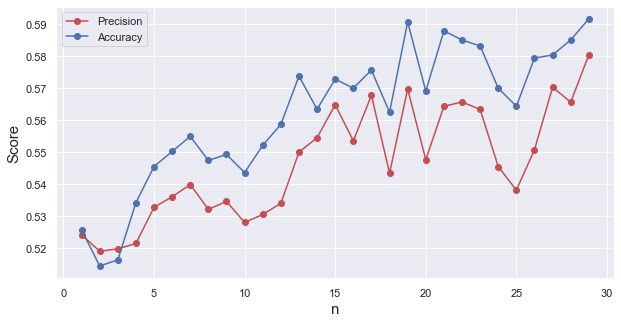

In [90]:
# Dados normalizados e com o critério gini
train = X_train_normalized

best_n = ExecuteRandomForest(train)

In [91]:
# Executando o random forest com o critério GINI - Dados normalizados
train = X_train_normalized
test = X_test_normalized

AccRandomForest(train, test, best_n)

Accuracy: 0.6105


Melhor n: 23  Precision: 0.5831297282505458


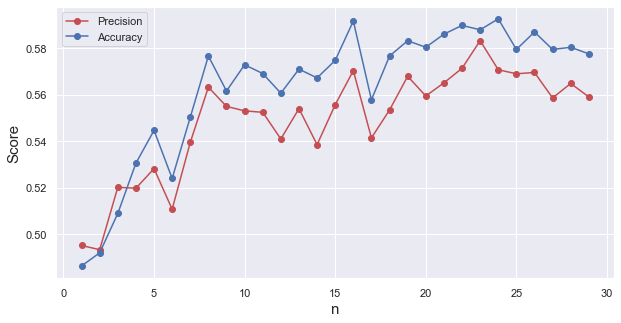

In [92]:
# Dados normalizados e com o critério entropy
train = X_train_normalized

best_n = ExecuteRandomForest(train, 'entropy')

In [93]:
# Executando o random forest com o critério entropia - Dados normalizados
train = X_train_normalized
test = X_test_normalized

AccRandomForest(train, test, best_n, 'entropy')

Accuracy: 0.6180


Melhor n: 15  Precision: 0.5788966733589818


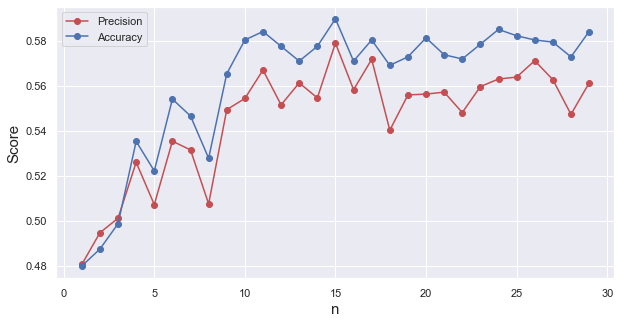

In [94]:
# Dados padroniados e com o critério gini
train = X_train_scaled

best_n = ExecuteRandomForest(train)

In [95]:
# Executando o random forest com o critério GINI - Dados padronizados
train = X_train_scaled
test = X_test_scaled

AccRandomForest(train, test, best_n)

Accuracy: 0.5655


Melhor n: 18  Precision: 0.590855148038456


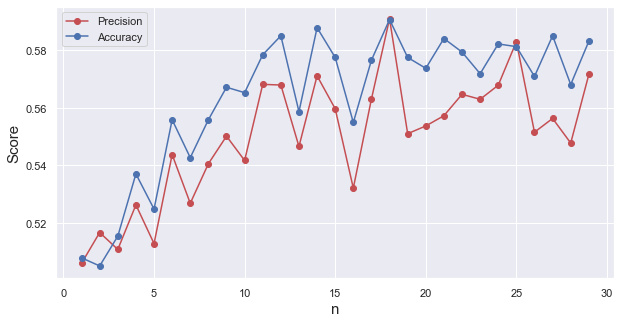

In [96]:
# Dados padronizados e com o critério entropy
train = X_train_scaled

best_n = ExecuteRandomForest(train, 'entropy')

In [97]:
# Executando o random forest com o critério entropy - Dados padronizados
train = X_train_scaled
test = X_test_scaled

AccRandomForest(train, test, best_n, 'entropy')

Accuracy: 0.6105


<span style='color:black;font-weight:bold'>No caso do Random Forest, minha melhor acurácia foi com a métrica de entropia para os dados normalizados. <br>Seguindo nessa mesma direção, obtive a melhor acurácia com os dados padronizados utilizando a métrica de entropia também.<br>Pelo o que eu percebi a entropia, para o RF, trabalhou melhor com os dados dentro de um mesmo intervalo.</span>

In [98]:
# Criei um método com os melhores parâmetros e para visualizar o resultado de cada um num mesmo gráfico
def ExecutarTodosModelos(train = X_train_normalized, test = X_test_normalized):
    
    models = {
        'KNN - Minkowski' : KNeighborsClassifier(n_neighbors=best_k, metric = 'minkowski'),
        'KNN - Euclidean' : KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean'),
        'Tree - Gini': DecisionTreeClassifier(random_state = 42),
        'Tree - Entropia': DecisionTreeClassifier(criterion = 'entropy',random_state = 42),
        'Random Forest - Gini': RandomForestClassifier
                                             (n_estimators=best_n, bootstrap=True, class_weight=None, criterion='gini',
                                                max_depth=None, max_features='auto', max_leaf_nodes=None,
                                                min_impurity_decrease=0.0, min_impurity_split=None,
                                                min_samples_leaf=1, min_samples_split=2,
                                                min_weight_fraction_leaf=0.0, n_jobs=1,
                                                oob_score=False, random_state=42, verbose=0,
                                                warm_start=False),
        'Random Forest - Entropy': RandomForestClassifier
                                             (n_estimators=best_n, bootstrap=True, class_weight=None, criterion='entropy',
                                                max_depth=None, max_features='auto', max_leaf_nodes=None,
                                                min_impurity_decrease=0.0, min_impurity_split=None,
                                                min_samples_leaf=1, min_samples_split=2,
                                                min_weight_fraction_leaf=0.0, n_jobs=1,
                                                oob_score=False, random_state=42, verbose=0,
                                                warm_start=False),
        'Naives Bayes - Gaussian': GaussianNB(),
        'Naives Bayes - Bernolli': BernoulliNB(),
        'Support Vector Machine - Kernel RBF': SVC(C = best_c, gamma = 'auto', random_state=42),
        'Support Vector Machine - Kernel Linear': SVC(C = best_c, gamma = 'auto', kernel='linear', random_state=42)
    }

    # Onde vou salvar as acurácias
    scores = {}

    for name, model in models.items():
        model.fit(train, Y_train)
        y_pred = model.predict(test)
    
        acc = accuracy_score(Y_test, y_pred)
        scores[name] = round(acc,4)
    
        print(f'Acurácia {name}: \t{acc:.4f}')
    
    return scores

In [99]:
# Com os dados normalizados, executarei com os melhores parâmetros obtidos (exceção feita para árvores de decisão e naive bayes)
scores = ExecutarTodosModelos()

Acurácia KNN - Minkowski: 	0.5993
Acurácia KNN - Euclidean: 	0.5993
Acurácia Tree - Gini: 	0.5243
Acurácia Tree - Entropia: 	0.5281
Acurácia Random Forest - Gini: 	0.6067
Acurácia Random Forest - Entropy: 	0.6067
Acurácia Naives Bayes - Gaussian: 	0.5581
Acurácia Naives Bayes - Bernolli: 	0.4307
Acurácia Support Vector Machine - Kernel RBF: 	0.5955
Acurácia Support Vector Machine - Kernel Linear: 	0.6030


Text(0.5, 1.0, 'Comparação Modelos - Classificação - Dados Normalizados')

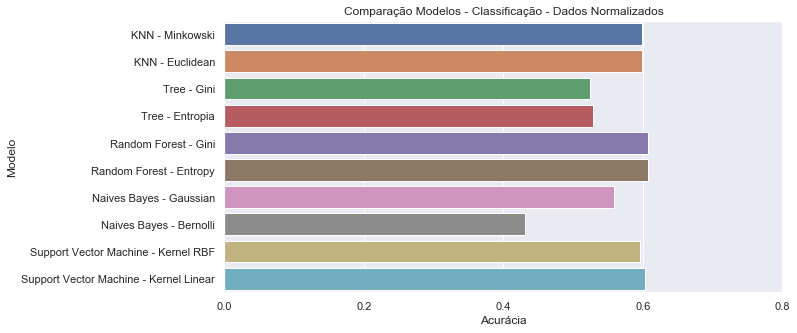

In [100]:
# Plotando gráfico com os classificadores utilizando o dado normalizado
plt.figure(figsize=(10, 5))

sns.barplot(list(scores.values()), list(scores.keys()))
plt.xticks(np.arange(0, 0.9, 0.2));
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.title('Comparação Modelos - Classificação - Dados Normalizados')

In [101]:
# Com os dados padronizados, executarei com os melhores parâmetros obtidos (exceção feita para árvores de decisão e naive bayes)
train = X_train_scaled
test  = X_test_scaled

scores = ExecutarTodosModelos(train, test)

Acurácia KNN - Minkowski: 	0.6180
Acurácia KNN - Euclidean: 	0.6180
Acurácia Tree - Gini: 	0.5281
Acurácia Tree - Entropia: 	0.5243
Acurácia Random Forest - Gini: 	0.6067
Acurácia Random Forest - Entropy: 	0.6030
Acurácia Naives Bayes - Gaussian: 	0.5581
Acurácia Naives Bayes - Bernolli: 	0.5506
Acurácia Support Vector Machine - Kernel RBF: 	0.6442
Acurácia Support Vector Machine - Kernel Linear: 	0.6030


Text(0.5, 1.0, 'Comparação Modelos - Classificação - Dados Padronizados')

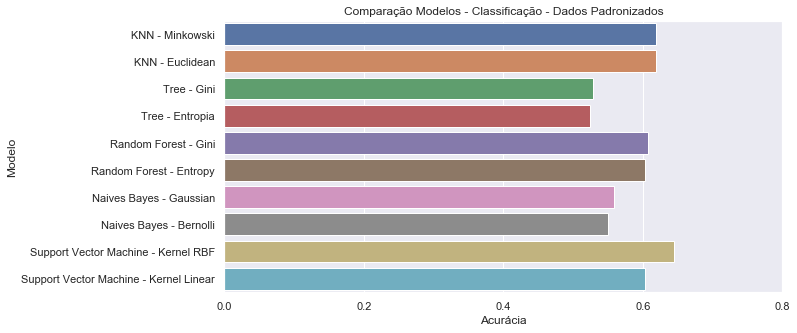

In [102]:
# Plotando gráfico com os classificadores utilizando o dado padronizado
plt.figure(figsize=(10, 5))

sns.barplot(list(scores.values()), list(scores.keys()))
plt.xticks(np.arange(0, 0.9, 0.2));
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.title('Comparação Modelos - Classificação - Dados Padronizados')

<span style='color:black'>Para os dados normalizados, temos que o algoritmo de random forest foi o melhor em ambos os critérios. Seguido pelo SVC Linear e os KNN.
    <br>
    Para os dados padronizados, com a melhor acurácia temos o Support Vector Machine, usando o kernel rbf. E após o SVC - RBF, o algoritmo random forest com o critério gini foi o melhor.<br> 
    Meus classificadores tiveram uma melhora retirando as classes 3 e 8.<br>Nessa execução, posso ter enviesado os algoritmos, após executá-los um por um e também cheguei a fazer outro tipo de análise adicionando random_state = 42 <br>Em outras execuções meus dados variaram bastante, mas seguindo com os melhores classificadores para ambos os cenários. Agora no segundo lugar teve bastante mudança.</span>

### <span style="color:black;">Ordenação dos Atributos</span>
<span style="color:black;">Aqui vou explorar um pouco mais os parâmetros do Random Forest para demonstrar que ocorre
uma variação da ordem dos atributos menos importantes.</span>

In [103]:
# Criei um método para facilitar as alterações que farei nos parâmetros e evitatr redundância de código
def RelativeImportance(model, X = X_train_normalized):
    features_names = X.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    lmeas_order = []
    
    for i in indices:
        lmeas_order.append(features_names[i])

    plt.figure(figsize=(12,8))
    #sns.barplot(list(range(len(indices))), list(importances[indices]))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
    plt.xlabel('Relative Importance',fontsize=15)
    plt.xticks(color='k', size=20)
    plt.yticks(color='k', size=20)
    plt.show()

In [104]:
# Criei um método para facilitar as alterações que farei nos parâmetros e evitatr redundância de código
def ExecuteRandomForest(X = X_train_normalized, n = 100, criterion='gini'):
    model = RandomForestClassifier(n_estimators=n, bootstrap=True, class_weight=None, criterion=criterion,
                                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=1, min_samples_split=2,
                                    min_weight_fraction_leaf=0.0, n_jobs=1,
                                    oob_score=False, random_state=None, verbose=0,
                                    warm_start=False)
    model.fit(X, Y_train)
    
    return model

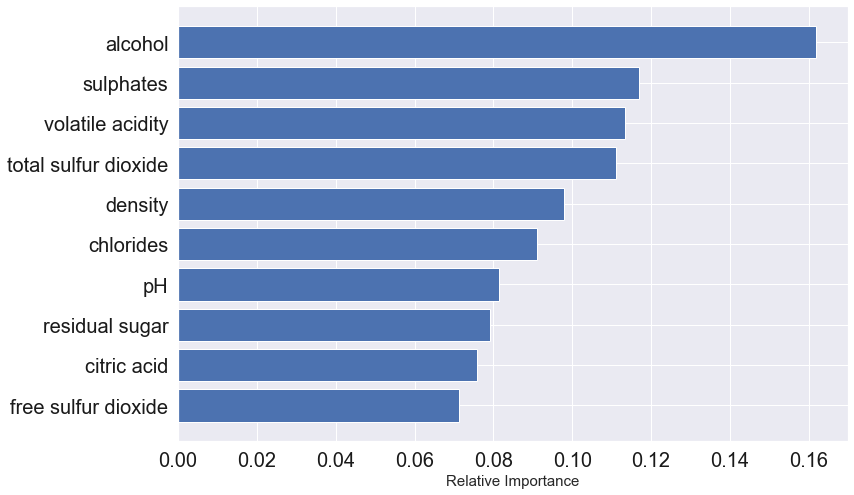

In [105]:
# Geração do modelo com o viés de dados normalizados, estimadores = 100 e o critério gini
model = ExecuteRandomForest()

RelativeImportance(model)

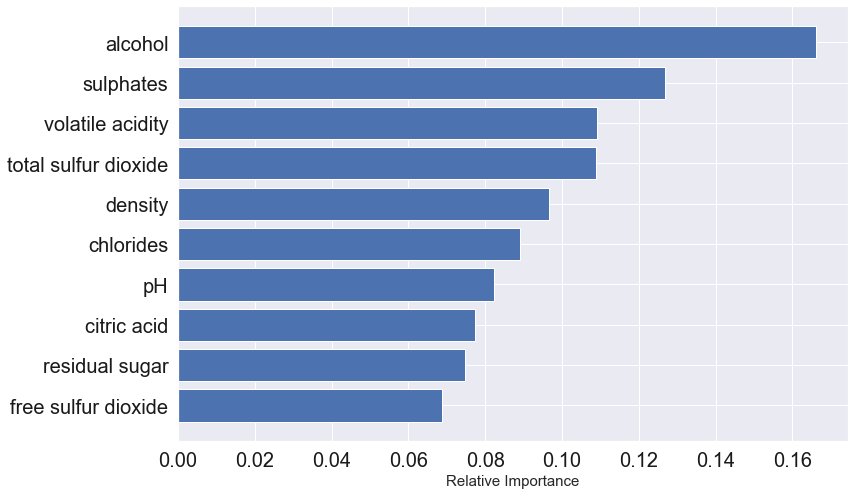

In [106]:
# Geração do modelo com o viés de dados normalizados, estimadores = 100 e o critério de entropia
model = ExecuteRandomForest(criterion = 'entropy')

RelativeImportance(model)

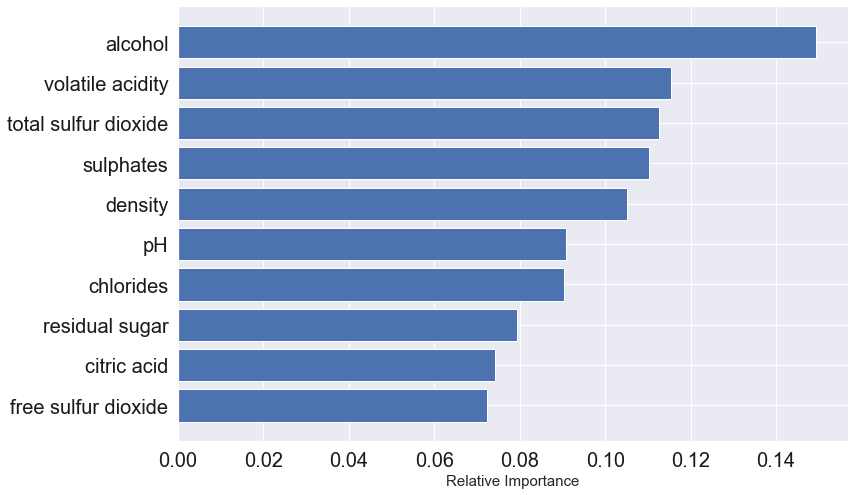

In [107]:
# Geração do modelo com o viés de dados normalizados, estimadores = o meu melhor estimador e o critério de gini
model = ExecuteRandomForest(n = best_n)

RelativeImportance(model)

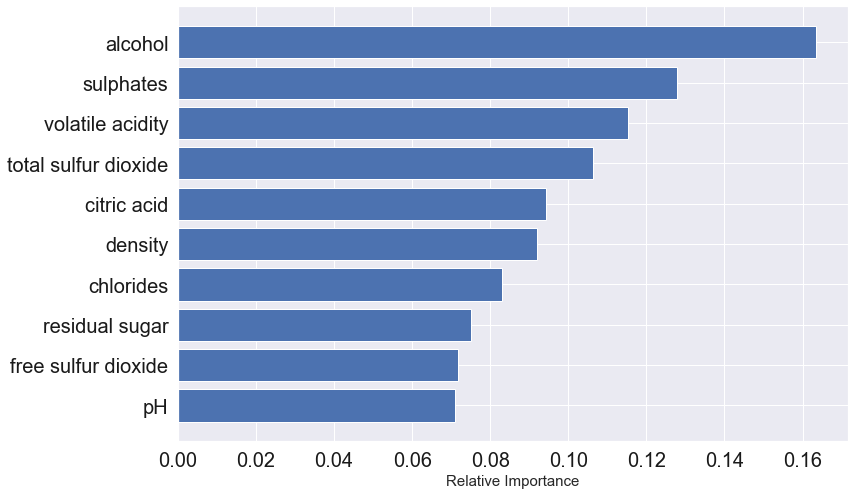

In [108]:
# Geração do modelo com o viés de dados normalizados, estimadores = o meu melhor estimador e o critério de entropia
model = ExecuteRandomForest(n = best_n, criterion='entropy')

RelativeImportance(model)

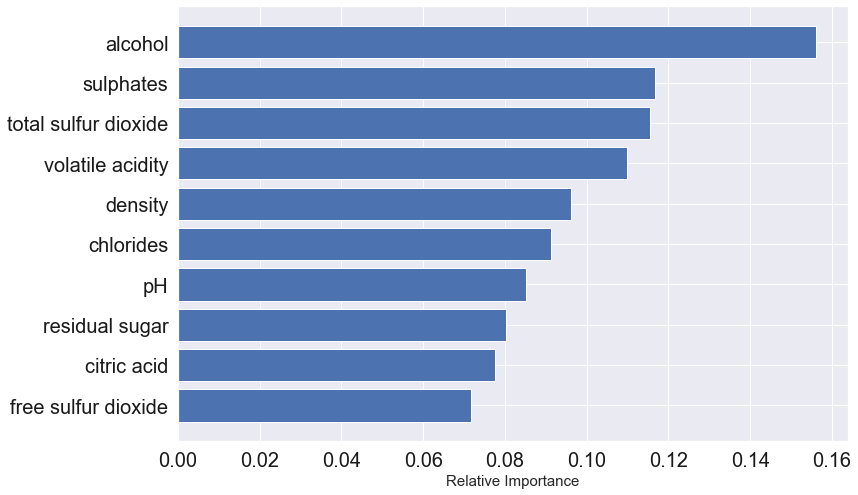

In [109]:
# Geração do modelo com o viés de dados padronizados, estimadores = 100 e o critério gini
model = ExecuteRandomForest(X = X_train_scaled)

RelativeImportance(model, X = X_train_scaled)

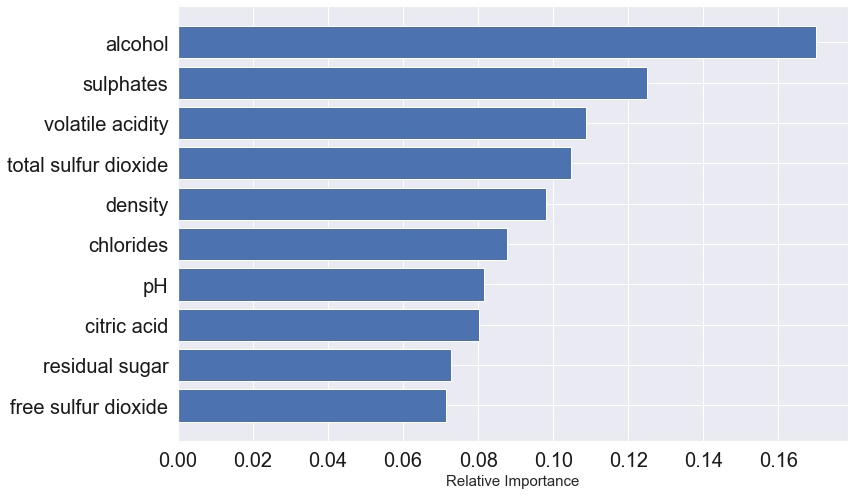

In [110]:
# Geração do modelo com o viés de dados padronizados, estimadores = 100 e o critério de entropia
model = ExecuteRandomForest(X = X_train_scaled, criterion = 'entropy')

RelativeImportance(model, X = X_train_scaled)

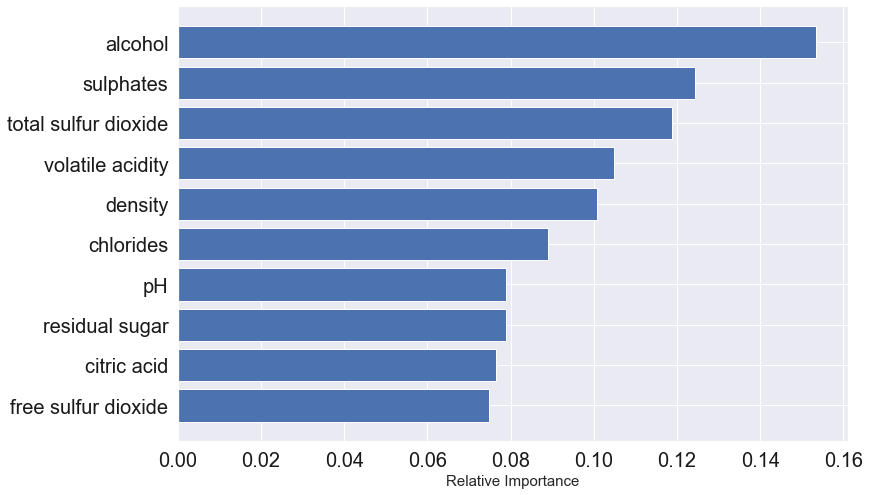

In [111]:
# Geração do modelo com o viés de dados padronizados, estimadores = o meu melhor estimador e o critério de gini
model = ExecuteRandomForest(X = X_train_scaled, n = best_n)

RelativeImportance(model, X = X_train_scaled)

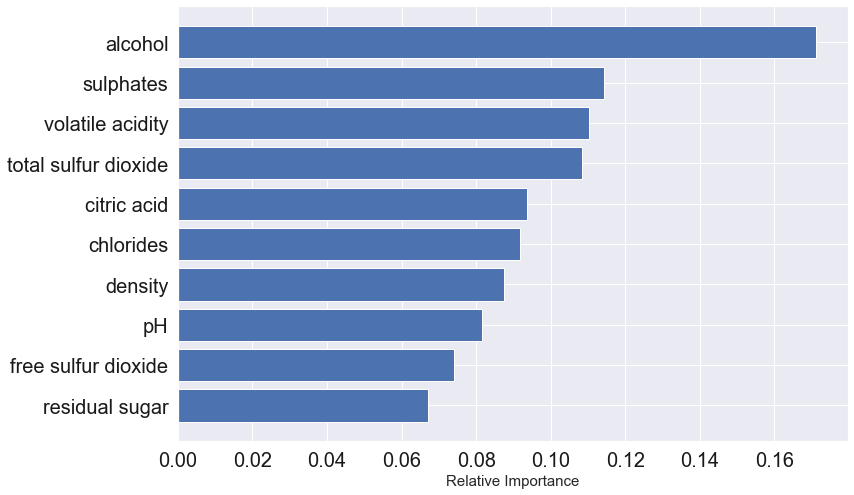

In [112]:
# Geração do modelo com o viés de dados padronizados, estimadores = o meu melhor estimador e o critério de entropia
model = ExecuteRandomForest(X = X_train_scaled, n = best_n, criterion='entropy')

RelativeImportance(model, X = X_train_scaled)

<span style='color:black'>Nesta 3ª etapa eu quis testar de diversas formas a importância relativa do Random Forest:
<br>
    <ul><li>Usando os critérios de entropia e gini, com o número de árvores com 100</li>
    <li>Usando os critérios de entropia e gini, com o número de árvores com o melhor resultado do estimador pela validação cruzada</li>
        <li>E dois pontos acima usando dado normalizado ou padronizado.</li></ul>
   <br>
    Todas as respostas apontaram para a variável Álcool de maior importância, no entanto houve mudanças nas importâncias das demais variáveis. Essas mudanças, geralmente, foram variáveis que estavam uma próxima a outra. Não ocorreu em nenhum momento a última variável ser a 3 ou a 4 mais importante.
    </span>

### <span style="color:black;"> 4 - Regressão Linear</span>
<span style="color:black;">Predizer o álcool com a regressão linear e realizar comparações de métodos</span>

In [113]:
# Usando o cenário de dados normalizados
X_linear_normalized_train, y_linear_normalized_train = SeparacaoClasse(data = X_train_normalized, target = 'alcohol')
X_linear_normalized_test, y_linear_normalized_test = SeparacaoClasse(data = X_test_normalized, target = 'alcohol')

(1065, 9)
(1065,)
(267, 9)
(267,)


In [114]:
# Usando o cenário de dados padronizados
X_linear_standarded_train, y_linear_standarded_train = SeparacaoClasse(data = X_train_scaled, target = 'alcohol')
X_linear_standarded_test, y_linear_standarded_test = SeparacaoClasse(data = X_test_scaled, target = 'alcohol')

(1065, 9)
(1065,)
(267, 9)
(267,)


<span style='color:black'>Aqui eu gerei novamente os dados de forma que o meu target seja o alcohol.</span>

In [115]:
# Método para facilitar a execução nos diferentes cenários
def ExecuteLR(X = X_linear_normalized_train, y = y_linear_normalized_train, X_test = X_linear_normalized_test, 
              y_test = y_linear_normalized_test):
    # instancia o modelo de regressao linear multipla
    linreg = LinearRegression()

    # ajusta os dados do conjunto de treinamento
    linreg.fit(X, y)

    # preve o target para os dados de teste
    y_pred_linreg = linreg.predict(X_test)

    # calcula o r2 score do modelo de regressao linear multipla
    r2_linreg = r2_score(y_test, y_pred_linreg)
    
    return r2_linreg, y_pred_linreg

In [116]:
# Executando o método de regressão linear com os dados normalizados
r2_linreg_normalizados, y_pred_linreg_normallized = ExecuteLR()

print(f'{r2_linreg_normalizados:.4f}')

0.4654


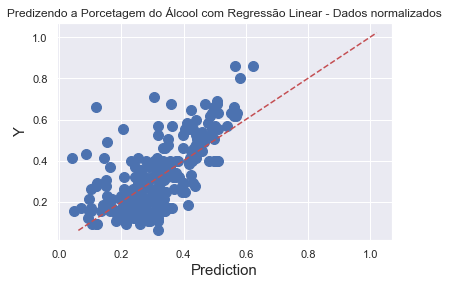

In [117]:
# Plotando o gráfico com os dados normalizados
fig = plt.figure()
l = plt.plot(y_pred_linreg_normallized, y_linear_normalized_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)
plt.title('Predizendo a Porcetagem do Álcool com Regressão Linear - Dados normalizados')

xl = np.arange(min(y_linear_normalized_test), 1.2*max(y_linear_normalized_test),
               (max(y_linear_normalized_test)-min(y_linear_normalized_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

In [118]:
# Executando o método de regressão linear com os dados normalizados
r2_linreg_padronizados, y_pred_linreg_standarded = ExecuteLR(X_linear_standarded_train, y_linear_standarded_train, 
                                                             X_linear_standarded_test, y_linear_standarded_test)

print(f'{r2_linreg_padronizados:.4f}')

0.4654


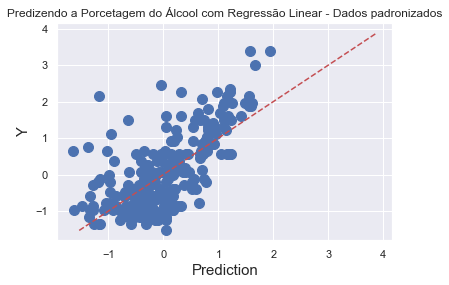

In [119]:
# Plotando o gráfico com os dados padronizados
fig = plt.figure()
l = plt.plot(y_pred_linreg_standarded, y_linear_standarded_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)
plt.title('Predizendo a Porcetagem do Álcool com Regressão Linear - Dados padronizados')

xl = np.arange(min(y_linear_standarded_test), 1.2*max(y_linear_standarded_test),
               (max(y_linear_standarded_test)-min(y_linear_standarded_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

<span style='color:black'>A resposta foi parecida para os dados normalizados ou dados padronizados.<br>Ocorreu uma concentração grande no começo do dados e que aos poucos foi se espelhando.<br> Os dados estão próximo a linha vermelha o que significa que a predição chegará próxima, para as classes com os primeiros valores. Para os valores igual a 3, a gente começa a perder uma boa predição.</span>

### <span style='color:black'>Comparações com os métodos Ridge Regression e LASSO</span>

#### Gráfico do Ridge Regression

In [120]:
def GrafRR(X = X_linear_normalized_train, y = y_linear_normalized_train, X_test = X_linear_normalized_test, 
              y_test = y_linear_normalized_test):
    
    vR2 = []
    valpha = []
    
    # variação dos valores de alpha
    for alpha in np.arange(0,10,0.5):
        ridge2 = Ridge(alpha = alpha, normalize = True)
        ridge2.fit(X, y)                                       # Fit a ridge regression on the training data
        y_pred = ridge2.predict(X_test)                        # Use this model to predict the test data
        r2 = r2_score(y_test, y_pred)
        vR2.append(r2)
        valpha.append(alpha)
    
    return valpha, vR2

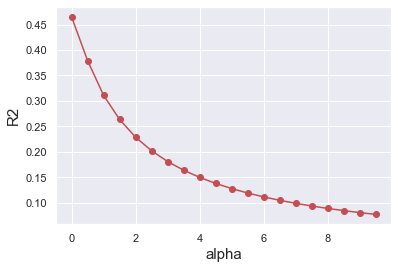

In [121]:
# Com dados normalizados    
valpha, vR2 = GrafRR()

plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

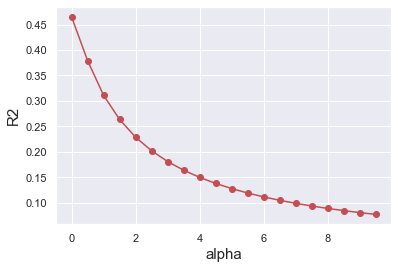

In [122]:
# Com dados padronizados   
valpha, vR2 = GrafRR(X_linear_standarded_train, y_linear_standarded_train, X_linear_standarded_test, y_linear_standarded_test)

plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

#### R2 - LASSO e Ridge Regression

In [123]:
# Método para facilitar a execução nos diferentes cenários
def R2LassoRidge(X = X_linear_normalized_train, y = y_linear_normalized_train, X_test = X_linear_normalized_test, 
              y_test = y_linear_normalized_test):
    # armazena os r2 score de cada alpha
    all_r2_lasso = []
    all_r2_ridge = []
    all_alpha = np.arange(0.1, 3.1, 0.1)

    for alpha in all_alpha:
        # instancia os modelos lasso e ridge
        lasso = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
        ridge = Ridge(alpha=alpha, normalize=True)
    
        # ajusta o modelo aos dados de treinamento
        lasso.fit(X, y)
        ridge.fit(X, y)
    
        # preve o target para os dados de teste
        y_pred_lasso = lasso.predict(X_test)
        y_pred_ridge = ridge.predict(X_test)
    
        # calcula o r2 score dos dois modelos
        r2_lasso = r2_score(y_test, y_pred_lasso)
        r2_ridge = r2_score(y_test, y_pred_ridge)
    
        # adiciona o score dos 2 modelos
        all_r2_lasso.append(r2_lasso)
        all_r2_ridge.append(r2_ridge)
        
    return all_r2_lasso, all_r2_ridge, all_alpha

In [124]:
# Executando o cenário com os dados normalizados
all_r2_lasso, all_r2_ridge, all_alpha = R2LassoRidge()

In [125]:
# Exibo a melhor pontucao R2 dos 3 modelos avaliados
# O modelo de regressão linear simples apresenta o melhor resultado
print(f'LinReg: {r2_linreg_normalizados:.4f}')
print(f'LASSO: {np.max(all_r2_lasso):.4f}')
print(f'Ridge: {np.max(all_r2_ridge):.4f}')

LinReg: 0.4654
LASSO: -0.0002
Ridge: 0.4527


In [126]:
def ShowR2Alpha(all_alpha = None, all_r2_lasso = None, all_r2_ridge = None):
    
    plt.plot(all_alpha, all_r2_lasso, '-bo', label='LASSO')
    plt.plot(all_alpha, all_r2_ridge, '-ro', label='Ridge')
    plt.xlabel("alpha", fontsize=15)
    plt.ylabel("R2", fontsize=15)
    plt.legend()
    plt.show(True)

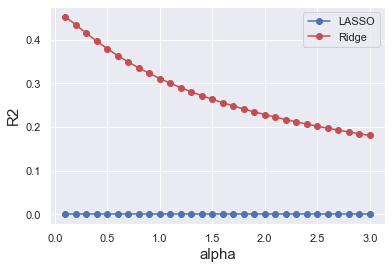

In [127]:
# Plotando os resultados com os dados normalizados
ShowR2Alpha(all_alpha, all_r2_lasso, all_r2_ridge)

In [128]:
# Executando o cenário com os dados padronizados
all_r2_lasso, all_r2_ridge, all_alpha = R2LassoRidge(X_linear_standarded_train, y_linear_standarded_train, 
                                                     X_linear_standarded_test, y_linear_standarded_test)

In [129]:
# Exibo a melhor pontucao R2 dos 3 modelos avaliados
# O modelo de regressão linear simples apresenta o melhor resultado
print(f'LinReg: {r2_linreg_padronizados:.4f}')
print(f'LASSO: {np.max(all_r2_lasso):.4f}')
print(f'Ridge: {np.max(all_r2_ridge):.4f}')

LinReg: 0.4654
LASSO: -0.0002
Ridge: 0.4527


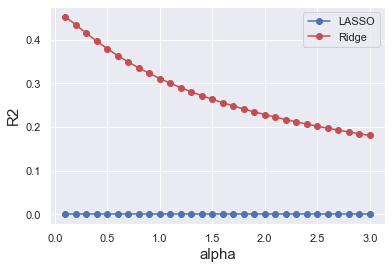

In [130]:
# Plotando os resultados com os dados padronizados
ShowR2Alpha(all_alpha, all_r2_lasso, all_r2_ridge)

#### RMSE - LASSO

In [131]:
def UseRMSELasso(X = X_linear_normalized_train, y = y_linear_normalized_train, X_test = X_linear_normalized_test, 
                 y_test = y_linear_normalized_test):
    
    alpha = 0.1
    lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lasso.fit(X, y)                                         # Fit a ridge regression on the training data
    y_pred = lasso.predict(X_test)                          # Use this model to predict the test data
    RSME = mean_squared_error(y_test, y_pred)               # Calculate the test MSE
    
    print(f'RSME: {RSME:.2f}')

In [132]:
# Com dados normalizados
UseRMSELasso()

RSME: 0.03


In [133]:
# Com dados padronizados
UseRMSELasso(X_linear_standarded_train, y_linear_standarded_train, X_linear_standarded_test, y_linear_standarded_test)

RSME: 1.07


<span style='color:black'>O erro quadrático foi enviesado pelo dados ora estar normalizado ou padronizado. Houve uma variância grande do resultado com os dois cenários.</span>

#### RMSE - LASSO e Ridge Regression

In [136]:
def RMSELRR(X = X_linear_normalized_train, y = y_linear_normalized_train, X_test = X_linear_normalized_test, 
              y_test = y_linear_normalized_test):
    
    # armazena os rmse score de cada alpha
    all_rmse_lasso = []
    all_rmse_ridge = []
    all_alpha = np.arange(0.1, 3.1, 0.1)

    for alpha in all_alpha:
        # instancia os modelos lasso e ridge
        lasso = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
        ridge = Ridge(alpha=alpha, normalize=True)
    
        # ajusta o modelo aos dados de treinamento
        lasso.fit(X, y)
        ridge.fit(X, y)
    
        # preve o target para os dados de teste
        y_pred_lasso = lasso.predict(X_test)
        y_pred_ridge = ridge.predict(X_test)
    
        # calcula o RMSE score dos dois modelos  
        RSME_lasso = mean_squared_error(y_test, y_pred_lasso)
        RSME_ridge = mean_squared_error(y_test, y_pred_ridge)
    
        # adiciona o score dos 2 modelos
        all_rmse_lasso.append(RSME_lasso)
        all_rmse_ridge.append(RSME_ridge)
        
    return all_rmse_lasso, all_rmse_ridge, all_alpha

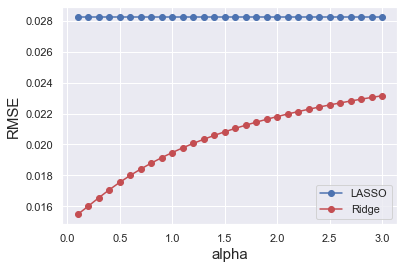

In [137]:
# Com dados normalizados
all_rmse_lasso, all_rmse_ridge, all_alpha = RMSELRR()

plt.plot(all_alpha, all_rmse_lasso, '-bo', label='LASSO')
plt.plot(all_alpha, all_rmse_ridge, '-ro', label='Ridge')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.legend()
plt.show(True)

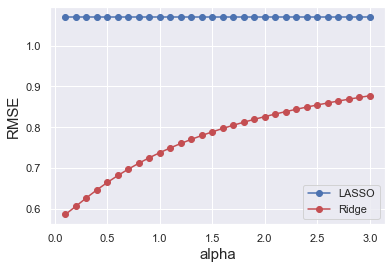

In [138]:
# Com dados padronizados
all_rmse_lasso, all_rmse_ridge, all_alpha = RMSELRR(X_linear_standarded_train, 
                                                    y_linear_standarded_train, X_linear_standarded_test,
                                                    y_linear_standarded_test)

plt.plot(all_alpha, all_rmse_lasso, '-bo', label='LASSO')
plt.plot(all_alpha, all_rmse_ridge, '-ro', label='Ridge')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.legend()
plt.show(True)

<span style='color:black'>Para os cenários de dados normalizados e padronizados, obtive uma resposta semelhante. LASSO seguindo com pouquíssima variância, quase uma linha reta. Enquanto o ridge regression subindo de acordo com o alpha, porém aos poucos se estabelecendo como se comportasse em uma reta.</span>

#### Coeficientes de relevância para o target - alcohol

In [139]:
def IdentifyOthersCoef(X = X_linear_normalized_train, y = y_linear_normalized_train):
    
    lasso = Lasso(alpha=0.1, normalize=True, max_iter=1e5)
    lasso.fit(X, y)

    # exibi os coeficientes de cada variavel
    for col, param in zip(X.columns, lasso.coef_):
        print('{}\t{:.2f}'.format(col, param))

In [140]:
# Com dados normalizados
IdentifyOthersCoef()

volatile acidity	-0.00
citric acid	0.00
residual sugar	0.00
chlorides	-0.00
free sulfur dioxide	-0.00
total sulfur dioxide	-0.00
density	-0.00
pH	0.00
sulphates	0.00


In [141]:
# Com dados padronizados
IdentifyOthersCoef(X = X_linear_standarded_train, y = y_linear_standarded_train)

volatile acidity	-0.00
citric acid	0.00
residual sugar	0.00
chlorides	-0.00
free sulfur dioxide	-0.00
total sulfur dioxide	-0.00
density	-0.00
pH	0.00
sulphates	0.00


<span style='color:black'>Aqui só validei para avaliar quais atributos eram coeficientes do alcohol, sendo que o alcohol não possui coeficientes por essa análise.</span>

### <span style="color:black;">Conclusão</span>
<span style="color:black;">Meus resultados melhoraram de acordo que eu retirei as classes 3 e 8. Elas estavam com pouquíssimos dados e para evitar que e o classificador se perdesse, eu as retirei. Além disso, acredito que eu tenha tomado uma boa decisão de eliminar a variável com mais correlação e que era a mais importante na visão do PCA, isso fez com que os meus outros atributos tivessem um crescimento na importância do PCA.<br>Outro ponto interessante foi quebrar o slipt em 3, evitando que a divisão por 5 ou por outro número tivesse que redondar o meu conjunto de treinamento e de teste, fiz com que quebrasse de forma que ficasse um inteiro. Acredito que isso influenciou na avaliação da acurácia.<br>
    Meus melhores classificadores foram o SVC e o Random Forest. A métrica foi um fator importante, principalmente quando eu não utilizei o random_state para o dado normalizado e padronizado. De certa forma, o random_state fez com que eu usasse a mesma reproducibilidade para os algoritmos, fazendo com que não tivesse uma mudança brusca na acurácia.<br>
Geralmente estava usando, nas aulas os dados padronizados, mas gostei da performance dos dados normalizados, arrisco a dizer que com a clusterização talvez eu pudesse se dar melhor com os dados normalizados. No PCA - dados normalizados, as classes pareciam um pouco mais distantes e mais fáceis de separá-las.<br>
    Para a terceira etapa, apliquei o random forest em ambos os cenários, mudando o seu critério e o número de estimadores a fim de identificar as mudanças que temos dos atributos de maiores importâncias. O alcohol sempre foi o de maior importância, mas os demais variaram, talvez não ocorreu mudança no primeiro lugar por faltar mais dados e aí a dificuldade de trabalhar com poucos dados. <br>
    A última etapa, na primeira versão, estava perdido pelo tempo, mas eu pude perceber que a predição era mais simples, fazendo com regressão linear. Ambos os cenários foram iguais, sendo que nas primeiras classes do alcohol o meu preditor era mais certeiro e assim que a classe fosse aumentando, por falta de dados acredito, quanto maior a classe mais distante ficava da minha linha vermelha e o preditor ficava menos efetivo. <br> Muito obrigado por deixarem eu entregar essa versão, fico em paz que eu pude fazer um melhor trabalho.
</span>